In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO
from PIL import Image
from tqdm import tqdm  # Import tqdm for progress bar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
from google.colab import drive
drive.mount('/content/drive')
# Replace '/content/drive/MyDrive/your_file.csv' with the path to your CSV file
file_path = '/content/drive/MyDrive/data-science-youtube-channel-videos-metadata.csv'

# Read CSV into a DataFrame
data = pd.read_csv(file_path)

Mounted at /content/drive


<ipython-input-5-9d6a04cc06cc>:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [6]:
data = pd.read_csv("data-science-youtube-channel-videos-metadata.csv")

# this data is all related to data science lesson
15 min presentation:
for 5 min talk about data cleaning and then how we distinguish the data science video (Anson)

for 4 min EDA () making assumption

for 5 min modeling () to use model to confirm assumption

for 1-2 min insight

In [ ]:
data.shape

(44261, 21)

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44261 entries, 0 to 44260
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelId           44261 non-null  object 
 1   channelTitle        44261 non-null  object 
 2   videoId             44261 non-null  object 
 3   publishedAt         44261 non-null  object 
 4   publishedAtSQL      44261 non-null  object 
 5   videoTitle          44261 non-null  object 
 6   videoDescription    43779 non-null  object 
 7   videoCategoryId     44260 non-null  float64
 8   videoCategoryLabel  44260 non-null  object 
 9   duration            44260 non-null  object 
 10  durationSec         44260 non-null  float64
 11  dimension           44260 non-null  object 
 12  definition          44260 non-null  object 
 13  caption             44260 non-null  object 
 14  thumbnail_maxres    34232 non-null  object 
 15  licensedContent     18811 non-null  float64
 16  view

In [ ]:
data.head()

channelId channelTitle      videoId           publishedAt  \
0  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  Z2Cy9IY7IBA  2020-08-20T20:39:38Z   
1  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  oS_tUs51T0A  2020-08-17T21:23:13Z   
2  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  yvmdIX9ZsPA  2020-08-14T15:02:25Z   
3  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  08kgJ8WM_Q0  2020-08-10T19:13:08Z   
4  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  h-qLNikIs-0  2020-08-03T22:44:45Z   

  publishedAtSQL                                         videoTitle  \
0  20/8/20 20:39  Add 500 to All Numbers in Text String? LET or ...   
1  17/8/20 21:23  Dynamic Excel Multiplication Table with Condit...   
2  14/8/20 15:02  Dueling Excel #191: Net Working Hours Spanning...   
3  10/8/20 19:13  Append Two Number Columns and Sort. Excel Magi...   
4   3/8/20 22:44  LET Function Advanced Array Formula for Dynami...   

                                    videoDescription  videoCategoryId  \
0  Download Excel File: http://excelisfun.net/fil...             27.0   
1  Download Excel File: http://excelisfun.net/fil...             27.0   
2  Download Excel File: http://excelisfun.net/fil...             27.0   
3  Download Excel File: http://excelisfun.net/fil...             27.0   
4  Download Excel File: http://excelisfun.net/fil...             27.0   

  videoCategoryLabel  duration  ...  dimension definition caption  \
0          Education  PT11M51S  ...         2d         hd   False   
1          Education   PT7M59S  ...         2d         hd   False   
2          Education  PT17M11S  ...         2d         hd   False   
3          Education   PT5M10S  ...         2d         hd   False   
4          Education  PT14M32S  ...         2d         hd   False   

  thumbnail_maxres licensedContent  viewCount  likeCount  dislikeCount  \
0              NaN             1.0        0.0       22.0           0.0   
1              NaN             1.0     5027.0      396.0           0.0   
2              NaN             1.0     4668.0      206.0           1.0   
3              NaN             1.0     5375.0      472.0           3.0   
4              NaN             1.0     5802.0      313.0           1.0   

   favoriteCount  commentCount  
0            0.0           4.0  
1            0.0          83.0  
2            0.0          66.0  
3            0.0         114.0  
4            0.0         132.0  

[5 rows x 21 columns]

# Data Clean

In [ ]:
data.isna().sum()

channelId                 0
channelTitle              0
videoId                   0
publishedAt               0
publishedAtSQL            0
videoTitle                0
videoDescription        482
videoCategoryId           1
videoCategoryLabel        1
duration                  1
durationSec               1
dimension                 1
definition                1
caption                   1
thumbnail_maxres      10029
licensedContent       25450
viewCount                 3
likeCount               859
dislikeCount            859
favoriteCount             1
commentCount           9365
dtype: int64

In [7]:
data[data.videoCategoryId.isna()]
row_miss_many = data[data.videoCategoryId.isna()].index
# row 42605 remove
data.drop(index=row_miss_many, axis =0, inplace=True)

channelId channelTitle      videoId  \
42605  UCkw4JCwteGrDHIsyIIKo4tQ     edureka!  fNyKZRgmrHU   

                publishedAt publishedAtSQL  \
42605  2014-08-28T11:49:54Z  28/8/14 11:49   

                                           videoTitle  \
42605  Android Projects by Edureka Students | Edureka   

                                        videoDescription  videoCategoryId  \
42605  Watch Sample Class Recording: http://www.edure...              NaN   

      videoCategoryLabel duration  ...  dimension definition caption  \
42605                NaN      NaN  ...        NaN        NaN     NaN   

      thumbnail_maxres licensedContent  viewCount  likeCount  dislikeCount  \
42605              NaN             NaN        NaN        NaN           NaN   

       favoriteCount  commentCount  
42605            NaN           NaN  

[1 rows x 21 columns]

In [8]:
data["having_thumbnail"] = 0

In [9]:
# mark 1 if there is thumbnail_maxre and 0 if there is not.
def having_thumbnail(df):
    df["having_thumbnail"] = 0
    df.loc[df.thumbnail_maxres.notna(), "having_thumbnail"] = 1
    return df

data = having_thumbnail(data)

In [10]:
data[data.viewCount.isna()]
row_miss_viewCount= data[data.viewCount.isna()].index
# row 33667,33668 remove
data.drop(index=row_miss_viewCount, axis =0, inplace=True)

channelId channelTitle      videoId  \
33667  UC8uU_wruBMHeeRma49dtZKA      Chandoo  LI2mBF0_22s   
33668  UC8uU_wruBMHeeRma49dtZKA      Chandoo  DzaLKF_ObFo   

                publishedAt publishedAtSQL  \
33667  2016-05-18T06:12:07Z   18/5/16 6:12   
33668  2016-04-15T14:45:44Z  15/4/16 14:45   

                                              videoTitle  \
33667   SUMPRODUCT - Beginner to Advanced - Master Class   
33668  Master Class 01 - Advanced Interactive Charts ...   

                                        videoDescription  videoCategoryId  \
33667  Learn all about Excel SUMPRODUCT formula - fro...             27.0   
33668  Here is the first episode of our Monthly Maste...             27.0   

      videoCategoryLabel    duration  ...  definition caption  \
33667          Education   PT1H38M4S  ...          hd   False   
33668          Education  PT1H19M54S  ...          hd   False   

                                        thumbnail_maxres licensedContent  \
33667  https://i.ytimg.com/vi/LI2mBF0_22s/maxresdefau...             NaN   
33668                                                NaN             NaN   

      viewCount  likeCount  dislikeCount  favoriteCount  commentCount  \
33667       NaN        2.0           1.0            0.0           0.0   
33668       NaN        3.0           3.0            0.0           NaN   

       having_thumbnail  
33667                 1  
33668                 0  

[2 rows x 22 columns]

In [11]:
data[data.likeCount == 0]["likeCount"]

3425     0.0
3427     0.0
3443     0.0
3736     0.0
3737     0.0
        ... 
44246    0.0
44248    0.0
44249    0.0
44251    0.0
44257    0.0
Name: likeCount, Length: 5847, dtype: float64

In [12]:
data[data.likeCount == 0]["dislikeCount"]

3425     0.0
3427     0.0
3443     0.0
3736     0.0
3737     0.0
        ... 
44246    0.0
44248    0.0
44249    0.0
44251    0.0
44257    0.0
Name: dislikeCount, Length: 5847, dtype: float64

example

https://www.youtube.com/watch?v=HrFf0J1I9l8

https://www.youtube.com/watch?v=Iw5O7-yX2M0

https://www.youtube.com/watch?v=dDWa95CiOYI

In [13]:
# Create a mask for rows where both "likeCount" and "dislikeCount" are NaN
mask_like_dislike_nan = data.loc[:,['likeCount', 'dislikeCount']].isna().all(axis=1)

data[mask_like_dislike_nan].head()
# Count the number of rows satisfying the condition
count_same_row = mask_like_dislike_nan.sum()

print("Rows where both likeCount and dislikeCount are NaN is", count_same_row)

# row with both NAN remove
row_miss_likeDislike= data[mask_like_dislike_nan].index
# Replace the values with -1 for "likeCount" and "dislikeCount" where both are NaN
data.loc[row_miss_likeDislike, "likeCount"] = -1
data.loc[row_miss_likeDislike, "dislikeCount"] = -1

data["like_dislike_error"] = 0
data.loc[row_miss_likeDislike, "like_dislike_error"] = 1

channelId channelTitle      videoId  \
1734  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  Iw5O7-yX2M0   
2191  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  HrFf0J1I9l8   
2378  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  D70_4_INHoY   
2409  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  wniN1YaLh58   
2987  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  5ZZ8j0LMH2M   

               publishedAt  publishedAtSQL  \
1734  2011-07-26T22:16:33Z   26/7/11 22:16   
2191  2010-06-22T16:22:11Z   22/6/10 16:22   
2378  2009-12-30T16:03:30Z  30/12/09 16:03   
2409  2009-11-30T19:12:02Z  30/11/09 19:12   
2987  2008-12-23T19:08:50Z  23/12/08 19:08   

                                             videoTitle  \
1734  Broken Wrist = No excelisfun Videos For About ...   
2191  excelisfun Search & Find Excel Videos, Playlis...   
2378  excelisfun Search for Excel Videos, Playlists ...   
2409  excelisfun Search For Excel Videos and Playlis...   
2987                           Snowy Merry Christmas #1   

                                       videoDescription  videoCategoryId  \
1734  Broken Wrist = No excelisfun Videos For About ...             28.0   
2191  See how to use the excelisfun YouTube channel:...             28.0   
2378  See how to find the Excel video that you want ...             28.0   
2409  1)Learn how to search for the Excel videos tha...             28.0   
2987  Seattle Snow December 23, 2008. Isaac Girvin p...             22.0   

        videoCategoryLabel duration  ...  definition caption  \
1734  Science & Technology    PT16S  ...          hd   False   
2191  Science & Technology  PT4M34S  ...          sd   False   
2378  Science & Technology  PT3M57S  ...          hd   False   
2409  Science & Technology  PT5M28S  ...          sd   False   
2987        People & Blogs    PT45S  ...          sd   False   

                                       thumbnail_maxres licensedContent  \
1734  https://i.ytimg.com/vi/Iw5O7-yX2M0/maxresdefau...             1.0   
2191                                                NaN             1.0   
2378  https://i.ytimg.com/vi/D70_4_INHoY/maxresdefau...             1.0   
2409                                                NaN             1.0   
2987                                                NaN             1.0   

     viewCount  likeCount  dislikeCount  favoriteCount  commentCount  \
1734    2799.0        NaN           NaN            0.0           0.0   
2191  227432.0        NaN           NaN            0.0          47.0   
2378  160796.0        NaN           NaN            0.0          59.0   
2409   22382.0        NaN           NaN            0.0          17.0   
2987  139140.0        NaN           NaN            0.0           0.0   

      having_thumbnail  
1734                 1  
2191                 0  
2378                 1  
2409                 0  
2987                 0  

[5 rows x 22 columns]

Rows where both likeCount and dislikeCount are NaN is 858


In [14]:
# row with both NAN remove
row_miss_commentCount= data[data.commentCount.isna()].index
data[data.commentCount.isna()].head()
# Replace the values with -1 for "likeCount" and "dislikeCount" where both are NaN
data.loc[row_miss_commentCount, "commentCount"] = -1

data["comment_error"] = 0
data.loc[row_miss_commentCount, "comment_error"] = 1

channelId channelTitle      videoId  \
1074  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  ZGZCoA1oap4   
2150  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  XsRnXUPZm1I   
2152  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  eRjmigkBXYg   
2154  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  S_sN-cmg6yY   
2373  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  aJ7RmgmtF8A   

               publishedAt publishedAtSQL  \
1074  2014-02-09T05:02:37Z    9/2/14 5:02   
2150  2010-07-22T12:28:03Z  22/7/10 12:28   
2152  2010-07-22T12:22:20Z  22/7/10 12:22   
2154  2010-07-22T12:20:27Z  22/7/10 12:20   
2373  2010-01-01T19:44:52Z   1/1/10 19:44   

                                             videoTitle  \
1074                 Seattle Snow Feb 8 2014. at Night.   
2150  Kid Copies Big Brother's YouTube Video of Fall...   
2152                          Kid Makes Jelly Bean Soup   
2154  Kid Pretends To Plant Garden with Rock Seeds a...   
2373       Kids Play With Whoopee Cushions on Christmas   

                                       videoDescription  videoCategoryId  \
1074  Seattle Snow on Feb 8, 2014. Isaac goes out in...             27.0   
2150  Little Brother pretends to fall off skateboard...             22.0   
2152  Kid Makes Jelly Bean Soup with pots and pans. ...             22.0   
2154  Kid Pretends To Plant Garden with Rock Seeds a...             22.0   
2373  Isaac and Big D play with Whoopee Cushions on ...             22.0   

     videoCategoryLabel duration  ...  caption  \
1074          Education  PT1M33S  ...    False   
2150     People & Blogs    PT12S  ...    False   
2152     People & Blogs  PT1M20S  ...    False   
2154     People & Blogs   PT4M2S  ...    False   
2373     People & Blogs    PT45S  ...    False   

                                       thumbnail_maxres licensedContent  \
1074  https://i.ytimg.com/vi/ZGZCoA1oap4/maxresdefau...             1.0   
2150                                                NaN             1.0   
2152                                                NaN             1.0   
2154                                                NaN             1.0   
2373                                                NaN             1.0   

     viewCount likeCount  dislikeCount  favoriteCount  commentCount  \
1074    5048.0      24.0           1.0            0.0           NaN   
2150    2388.0       5.0           3.0            0.0           NaN   
2152     544.0       3.0           0.0            0.0           NaN   
2154    1273.0       4.0           0.0            0.0           NaN   
2373    4505.0      17.0           2.0            0.0           NaN   

      having_thumbnail  like_dislike_error  
1074                 1                   0  
2150                 0                   0  
2152                 0                   0  
2154                 0                   0  
2373                 0                   0  

[5 rows x 23 columns]

In [15]:
data.isna().sum()

channelId                 0
channelTitle              0
videoId                   0
publishedAt               0
publishedAtSQL            0
videoTitle                0
videoDescription        482
videoCategoryId           0
videoCategoryLabel        0
duration                  0
durationSec               0
dimension                 0
definition                0
caption                   0
thumbnail_maxres      10027
licensedContent       25447
viewCount                 0
likeCount                 0
dislikeCount              0
favoriteCount             0
commentCount              0
having_thumbnail          0
like_dislike_error        0
comment_error             0
dtype: int64

In [16]:
data.head()

channelId channelTitle      videoId           publishedAt  \
0  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  Z2Cy9IY7IBA  2020-08-20T20:39:38Z   
1  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  oS_tUs51T0A  2020-08-17T21:23:13Z   
2  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  yvmdIX9ZsPA  2020-08-14T15:02:25Z   
3  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  08kgJ8WM_Q0  2020-08-10T19:13:08Z   
4  UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  h-qLNikIs-0  2020-08-03T22:44:45Z   

  publishedAtSQL                                         videoTitle  \
0  20/8/20 20:39  Add 500 to All Numbers in Text String? LET or ...   
1  17/8/20 21:23  Dynamic Excel Multiplication Table with Condit...   
2  14/8/20 15:02  Dueling Excel #191: Net Working Hours Spanning...   
3  10/8/20 19:13  Append Two Number Columns and Sort. Excel Magi...   
4   3/8/20 22:44  LET Function Advanced Array Formula for Dynami...   

                                    videoDescription  videoCategoryId  \
0  Download Excel File: http://excelisfun.net/fil...             27.0   
1  Download Excel File: http://excelisfun.net/fil...             27.0   
2  Download Excel File: http://excelisfun.net/fil...             27.0   
3  Download Excel File: http://excelisfun.net/fil...             27.0   
4  Download Excel File: http://excelisfun.net/fil...             27.0   

  videoCategoryLabel  duration  ...  thumbnail_maxres licensedContent  \
0          Education  PT11M51S  ...               NaN             1.0   
1          Education   PT7M59S  ...               NaN             1.0   
2          Education  PT17M11S  ...               NaN             1.0   
3          Education   PT5M10S  ...               NaN             1.0   
4          Education  PT14M32S  ...               NaN             1.0   

  viewCount likeCount dislikeCount  favoriteCount  commentCount  \
0       0.0      22.0          0.0            0.0           4.0   
1    5027.0     396.0          0.0            0.0          83.0   
2    4668.0     206.0          1.0            0.0          66.0   
3    5375.0     472.0          3.0            0.0         114.0   
4    5802.0     313.0          1.0            0.0         132.0   

   having_thumbnail  like_dislike_error  comment_error  
0                 0                   0              0  
1                 0                   0              0  
2                 0                   0              0  
3                 0                   0              0  
4                 0                   0              0  

[5 rows x 24 columns]

## EDA

In [17]:
import datetime as dt

# Convert 'publishedAt' column to datetime format
data['publishedAt'] = pd.to_datetime(data['publishedAt'])

# Extract date, hour, minute, and second components
data['date'] = data['publishedAt'].dt.date
data['hour'] = data['publishedAt'].dt.hour
data['month'] = data['publishedAt'].dt.month
data['year'] = data['publishedAt'].dt.year
data['day'] = data['publishedAt'].dt.day
data['daysOfWeek'] = data['publishedAt'].dt.day_name()

# Get today's date in UTC timezone
recent_date = max(data.publishedAt)

# Calculate the time difference in days from published date to today's date
data['days_since_published'] = (recent_date - data['publishedAt']).dt.days

<Axes: xlabel='publishedAt'>

Text(0.5, 1.0, 'Time Series of Average View Count (Daily)')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Average View Count')

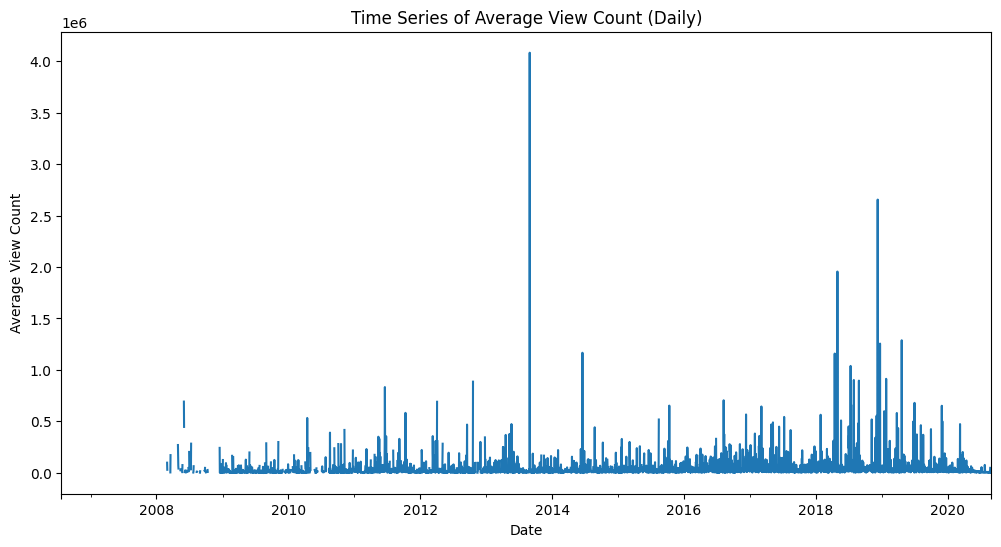

In [18]:
# Time series analysis of viewCount
data['publishedAt'] = pd.to_datetime(data['publishedAt'])
viewcount_ts = data.resample('D', on='publishedAt')['viewCount'].mean()
viewcount_ts.plot(figsize=(12, 6), kind='line')
plt.title('Time Series of Average View Count (Daily)')
plt.xlabel('Date')
plt.ylabel('Average View Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='durationSec', ylabel='viewCount'>

Text(0.5, 1.0, 'View Count vs. Video Duration')

Text(0.5, 0, 'Duration (Seconds)')

Text(0, 0.5, 'View Count')

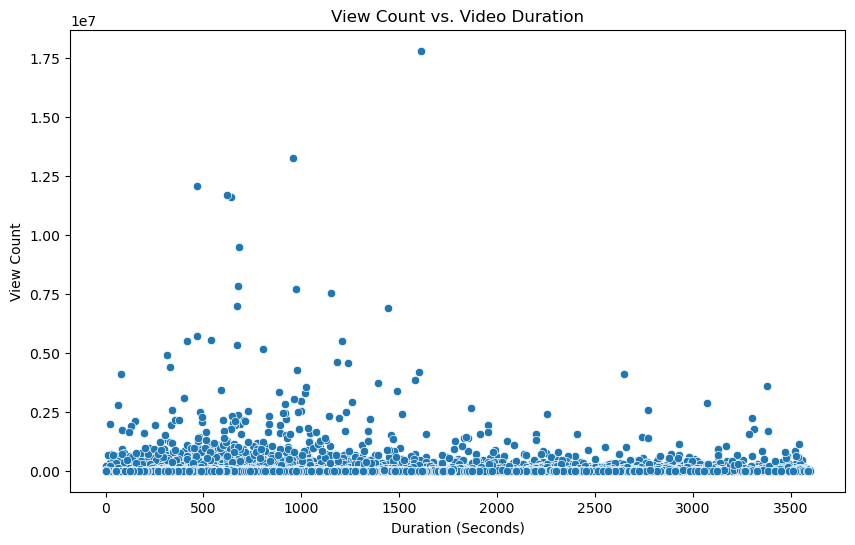

In [ ]:
# scatterplot of view count vs. video duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='durationSec', y='viewCount', data=data)
plt.title('View Count vs. Video Duration')
plt.xlabel('Duration (Seconds)')
plt.ylabel('View Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Number of Videos and Average View Count by Channels')

Text(0.5, 0, 'Channel Title')

Text(0, 0.5, 'Number of Videos')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, 'Packt Video'),
  Text(1, 0, 'ExcelIsFun'),
  Text(2, 0, 'edureka!'),
  Text(3, 0, 'MrExcel.com'),
  Text(4, 0, 'Simplilearn'),
  Text(5, 0, 'Hasgeek TV'),
  Text(6, 0, 'Intellipaat'),
  Text(7, 0, 'Telusko'),
  Text(8, 0, 'My E-Lesson'),
  Text(9, 0, 'EuroPython Conference'),
  Text(10, 0, 'sentdex'),
  Text(11, 0, 'freeCodeCamp.org'),
  Text(12, 0, 'Analytics India Magazine'),
  Text(13, 0, 'Great Learning'),
  Text(14, 0, 'Krish Naik'),
  Text(15, 0, 'H2O.ai'),
  Text(16, 0, 'Dinesh Kumar Takyar'),
  Text(17, 0, 'Data Science Tutorials'),
  Text(18, 0, 'Artificial Intelligence - All in One'),
  Text(19, 0, 'KDD2016 video'),
  Text(20, 0, 'Tech With Tim'),
  Text(21, 0, 'Contextures Inc.'),
  Text(22, 

Text(0, 0.5, 'Average View Count')

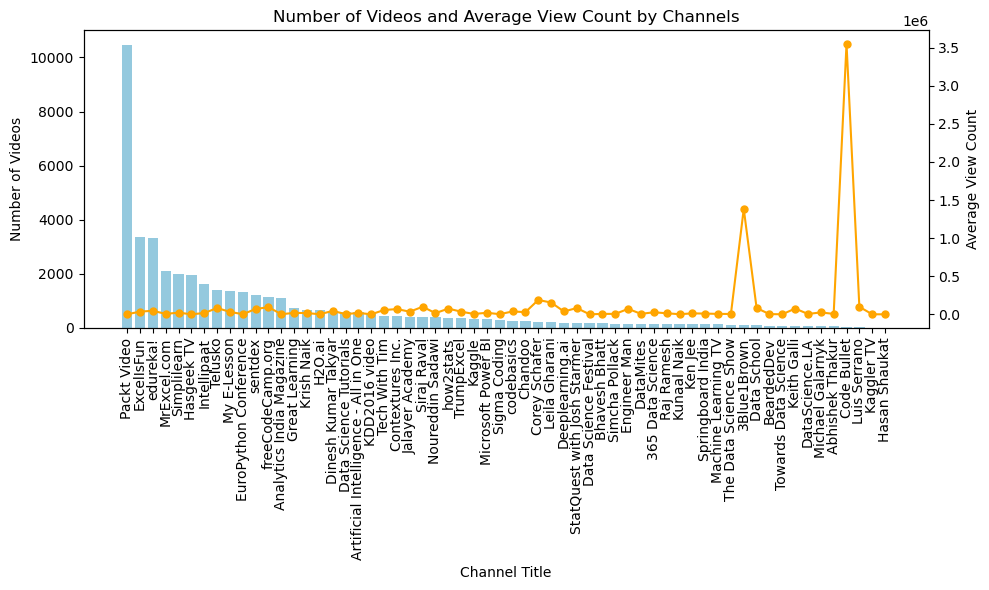

In [ ]:
# same below but with avg viewcount
plt.figure(figsize=(10, 6))
# Calculate channel counts
channel_video_counts = data['channelTitle'].value_counts()

# Sort the channels based on the total view count in descending order
sorted_channels = channel_video_counts.index

# Plot the bar plot
ax = sns.barplot(x=channel_video_counts.index, y=channel_video_counts.values, color='skyblue', order=sorted_channels)

# Set the title and labels for the bar plot
plt.title('Number of Videos and Average View Count by Channels')
plt.xlabel('Channel Title')
plt.ylabel('Number of Videos')
plt.xticks(rotation=90)

# Create a secondary y-axis on the right side for average view count
ax2 = ax.twinx()
ax2.set_ylabel('Average View Count')

# Plot lines for average view count of each channel
channel_avg_view = data.groupby('channelTitle')['viewCount'].mean()
ax2.plot(sorted_channels, channel_avg_view.loc[sorted_channels], linestyle='-', marker='o', markersize=5, color='orange')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Number of Videos and Average View Count by Categories')

Text(0.5, 0, 'Channel Title')

Text(0, 0.5, 'Number of Videos')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Science & Technology'),
  Text(1, 0, 'Education'),
  Text(2, 0, 'Howto & Style'),
  Text(3, 0, 'People & Blogs'),
  Text(4, 0, 'Film & Animation'),
  Text(5, 0, 'Travel & Events'),
  Text(6, 0, 'Entertainment'),
  Text(7, 0, 'Sports'),
  Text(8, 0, 'Pets & Animals'),
  Text(9, 0, 'Comedy'),
  Text(10, 0, 'Gaming'),
  Text(11, 0, 'News & Politics'),
  Text(12, 0, 'Autos & Vehicles'),
  Text(13, 0, 'Music'),
  Text(14, 0, 'Nonprofits & Activism')])

Text(0, 0.5, 'Average View Count')

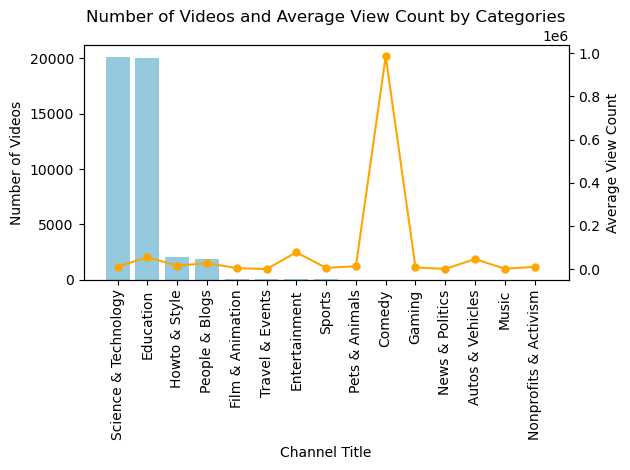

In [ ]:
#with avg viewcount
# Calculate the total view count for each video category
category_video_counts = data.groupby('videoCategoryLabel')['videoId'].size()

# Sort the categories based on the total view count in descending order
sorted_categories = category_video_counts.sort_values(ascending=False).index

# Plot the bar plot
ax = sns.barplot(x=category_video_counts.index, y=category_video_counts.values, color='skyblue', order=sorted_categories)

# Set the title and labels for the bar plot
plt.title('Number of Videos and Average View Count by Categories')
plt.xlabel('Channel Title')
plt.ylabel('Number of Videos')
plt.xticks(rotation=90)

# Create a secondary y-axis on the right side for average view count
ax2 = ax.twinx()
ax2.set_ylabel('Average View Count')

# Plot lines for average view count of each channel
category_avg_view = data.groupby('videoCategoryLabel')['viewCount'].mean()
ax2.plot(sorted_categories, category_avg_view.loc[sorted_categories], linestyle='-', marker='o', markersize=5, color='orange')

plt.tight_layout()
plt.show()

<Axes: xlabel='durationSec'>

Text(0.5, 1.0, 'Stacked Bar Plot: Duration vs Category')

Text(0.5, 0, 'Duration Group')

Text(0, 0.5, 'Number of Videos')

[Text(0, 0, '(0.0, 327.182]'),
 Text(1, 0, '(327.182, 654.364]'),
 Text(2, 0, '(654.364, 981.545]'),
 Text(3, 0, '(981.545, 1308.727]'),
 Text(4, 0, '(1308.727, 1635.909]'),
 Text(5, 0, '(1635.909, 1963.091]'),
 Text(6, 0, '(1963.091, 2290.273]'),
 Text(7, 0, '(2290.273, 2617.455]'),
 Text(8, 0, '(2617.455, 2944.636]'),
 Text(9, 0, '(2944.636, 3271.818]'),
 Text(10, 0, '(3271.818, 3599.0]')]

Text(0, 0.5, 'Mean View Count (log scale)')

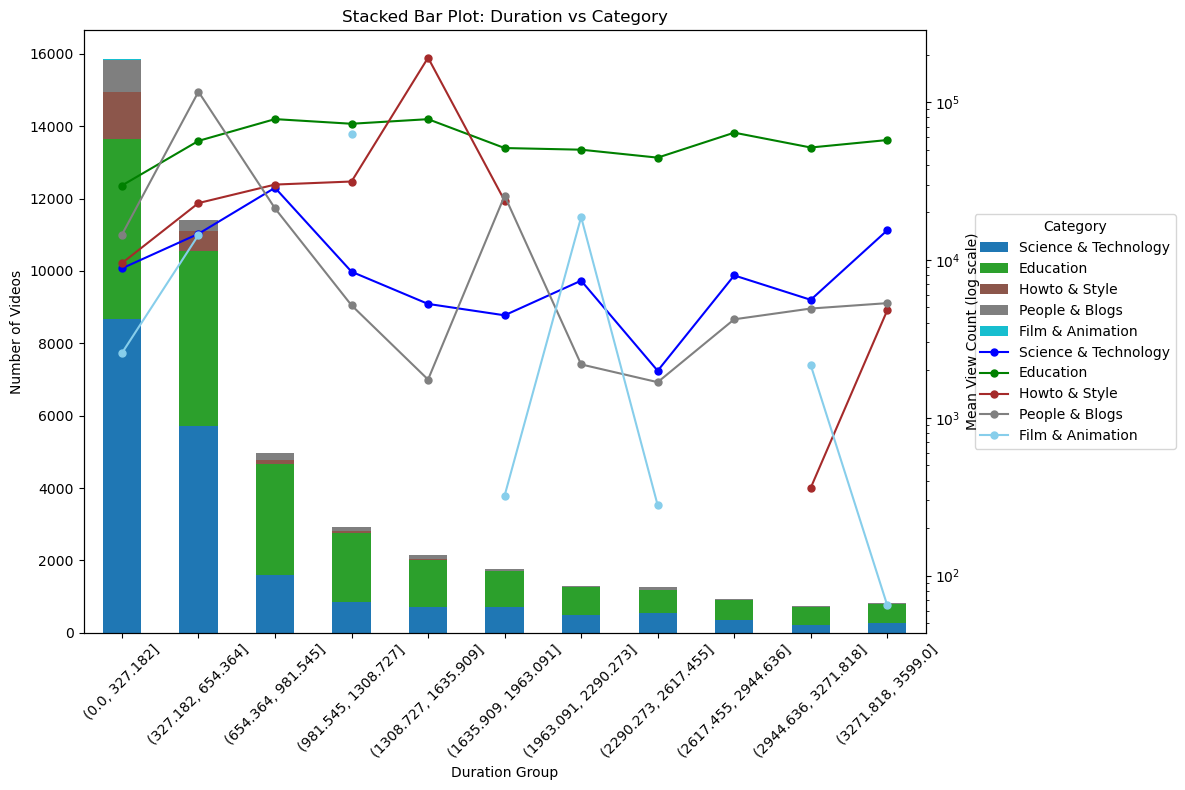

In [ ]:
# Determine bin edges based on the range of durationSec column
min_duration = data['durationSec'].min()
max_duration = data['durationSec'].max()
num_bins = 11
bin_edges = [min_duration + (max_duration - min_duration) * i / num_bins for i in range(num_bins + 1)]

# Create bins for durationSec using the specified bin edges
duration_bins = pd.cut(data['durationSec'], bins=bin_edges)

# Group by durationSec and category
duration_category_counts = data.groupby([duration_bins, 'videoCategoryLabel']).size().unstack()

# Select only the top 5 categories by number of views
top_categories = duration_category_counts.sum().nlargest(5).index
duration_category_counts = duration_category_counts[top_categories]

# Define colors for each category
category_colors = {
    'Science & Technology': 'blue',
    'Education': 'green',
    'Howto & Style': 'brown',
    'People & Blogs': 'gray',
    'Film & Animation': 'skyblue'
}

# Plot stacked bar graph for durationSec
fig, ax = plt.subplots(figsize=(12, 8))
duration_category_counts.plot(kind='bar', stacked=True, colormap='tab10', ax=ax)
ax.set_title('Stacked Bar Plot: Duration vs Category')
ax.set_xlabel('Duration Group')
ax.set_ylabel('Number of Videos')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Create a secondary y-axis on the right side for mean view count (logarithmic scale)
ax2 = ax.twinx()
ax2.set_ylabel('Mean View Count (log scale)')

# Plot lines for mean view count of top categories
lines = []  # List to store line objects for legend
for category, color in category_colors.items():
    mean_view_counts = []
    for duration_bin in duration_category_counts.index:
        start, end = duration_bin.left, duration_bin.right
        mean_view_count = data[(data['durationSec'] >= start) & (data['durationSec'] <= end)
                               & (data['videoCategoryLabel'] == category)]['viewCount'].mean()
        mean_view_counts.append(mean_view_count)
    line, = ax2.plot(mean_view_counts, linestyle='-', marker='o', markersize=5, color=color, label=category)
    lines.append(line)

# Combine handles and labels from both the bar plot and the line plot for legend
bar_handles, bar_labels = ax.get_legend_handles_labels()
line_handles, line_labels = ax2.get_legend_handles_labels()
all_handles = bar_handles + line_handles
all_labels = bar_labels + line_labels

# Create a single legend
ax.legend(all_handles, all_labels, title='Category', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Set the y-axis scale of the right axis to logarithmic
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

<Axes: xlabel='durationSec'>

Text(0.5, 1.0, 'Stacked Bar Plot: Duration vs channelTitle (Top 5)')

Text(0.5, 0, 'Duration Group')

Text(0, 0.5, 'Number of Videos')

[Text(0, 0, '(0.0, 327.182]'),
 Text(1, 0, '(327.182, 654.364]'),
 Text(2, 0, '(654.364, 981.545]'),
 Text(3, 0, '(981.545, 1308.727]'),
 Text(4, 0, '(1308.727, 1635.909]'),
 Text(5, 0, '(1635.909, 1963.091]'),
 Text(6, 0, '(1963.091, 2290.273]'),
 Text(7, 0, '(2290.273, 2617.455]'),
 Text(8, 0, '(2617.455, 2944.636]'),
 Text(9, 0, '(2944.636, 3271.818]'),
 Text(10, 0, '(3271.818, 3599.0]')]

Text(0, 0.5, 'Mean View Count')

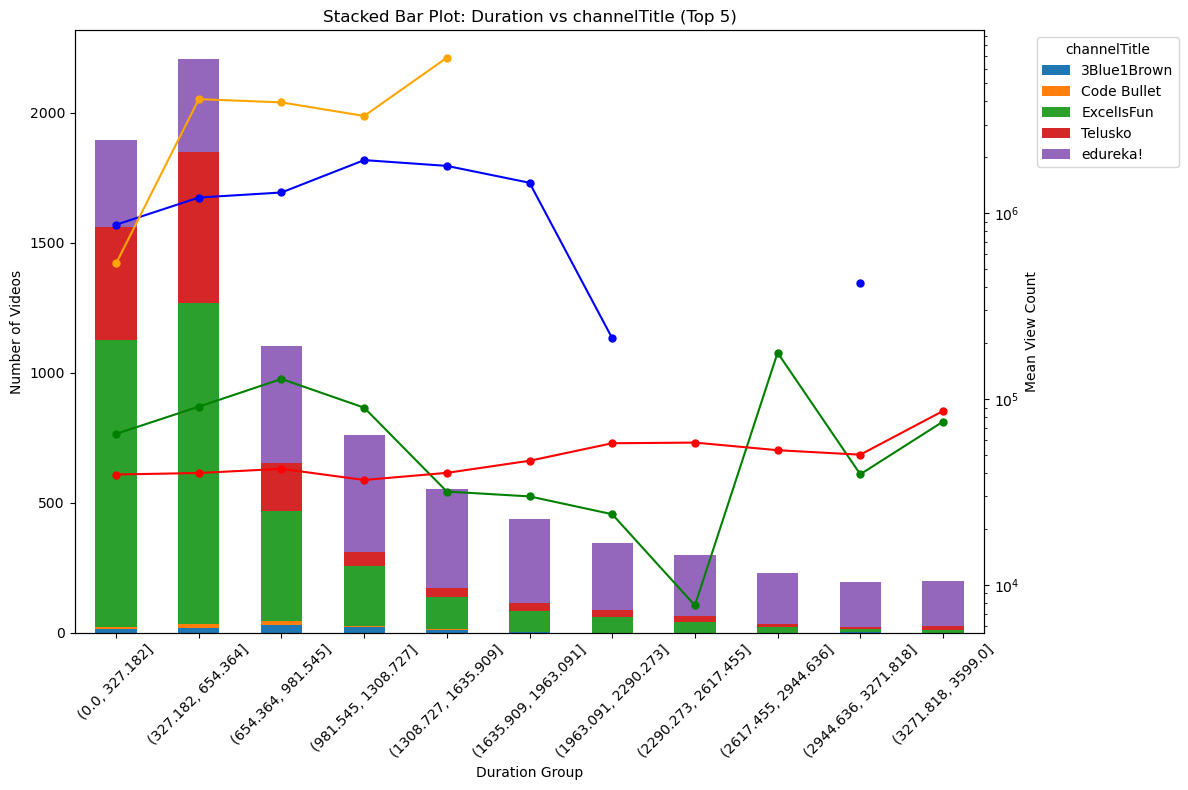

In [ ]:
import matplotlib.pyplot as plt

# Find the largest 5 channel titles based on view count
largest_channels = data.groupby('channelTitle')['viewCount'].sum().nlargest(5).index

# Filter the original DataFrame to include only the largest channels
filtered_data = data[data['channelTitle'].isin(largest_channels)]

# Group by durationSec and channelTitle
duration_chanti_counts = filtered_data.groupby([duration_bins, 'channelTitle']).size().unstack()

# Define colors for each channel
channel_colors = {
    '3Blue1Brown': 'blue',
    'Code Bullet': 'orange',
    'Telusko': 'green',
    'edureka!': 'red',
    'freeCodeCamp.org': 'purple'
}

# Plot stacked bar graph for durationSec
fig, ax = plt.subplots(figsize=(12, 8))
duration_chanti_counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Stacked Bar Plot: Duration vs channelTitle (Top 5)')
ax.set_xlabel('Duration Group')
ax.set_ylabel('Number of Videos')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(title='channelTitle', bbox_to_anchor=(1.05, 1), loc='upper left')

# Create a secondary y-axis on the right side for mean view count
ax2 = ax.twinx()
ax2.set_ylabel('Mean View Count')

# Plot lines for mean view count of top channels
for channel, color in channel_colors.items():
    mean_view_counts = []
    for duration_bin in duration_chanti_counts.index:
        start, end = duration_bin.left, duration_bin.right
        mean_view_count = filtered_data[(filtered_data['durationSec'] >= start) & (filtered_data['durationSec'] <= end)
                               & (filtered_data['channelTitle'] == channel)]['viewCount'].mean()
        mean_view_counts.append(mean_view_count)
    ax2.plot(mean_view_counts, linestyle='-', marker='o', markersize=5, color=color, label=channel)

# Set the scale of the right y-axis to logarithmic
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

In [ ]:
data2 = data.copy()
# fill na
data2['licensedContent'].fillna(value = 0, inplace = True)
data2.isna().sum()

channelId                   0
channelTitle                0
videoId                     0
publishedAt                 0
publishedAtSQL              0
videoTitle                  0
videoDescription          482
videoCategoryId             0
videoCategoryLabel          0
duration                    0
durationSec                 0
dimension                   0
definition                  0
caption                     0
thumbnail_maxres        10027
licensedContent             0
viewCount                   0
likeCount                   0
dislikeCount                0
favoriteCount               0
commentCount                0
having_thumbnail            0
like_dislike_error          0
comment_error               0
date                        0
hour                        0
month                       0
year                        0
daysOfWeek                  0
days_since_published        0
dtype: int64

In [ ]:
# Convert to str
data2['definition'] = data2['definition'].astype(str)
data2['caption'] = data2['caption'].astype(str)
data2['licensedContent'] = data2['licensedContent'].astype(str)

# Combine the 3
data2['combined_features'] = data2['definition'] + '_' + data2['caption'] + '_' + data2['licensedContent']

<Figure size 1200x600 with 0 Axes>

c:\Users\anson\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='combined_features', ylabel='viewCount'>

Text(0.5, 1.0, 'Boxplot: View Count by Definition, Caption, and Licensed Content')

Text(0.5, 0, 'combined_features')

Text(0, 0.5, 'View Count')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'hd_False_1.0'),
  Text(1, 0, 'hd_True_1.0'),
  Text(2, 0, 'hd_False_0.0'),
  Text(3, 0, 'hd_True_0.0'),
  Text(4, 0, 'sd_False_1.0'),
  Text(5, 0, 'sd_True_1.0'),
  Text(6, 0, 'sd_False_0.0'),
  Text(7, 0, 'sd_True_0.0')])

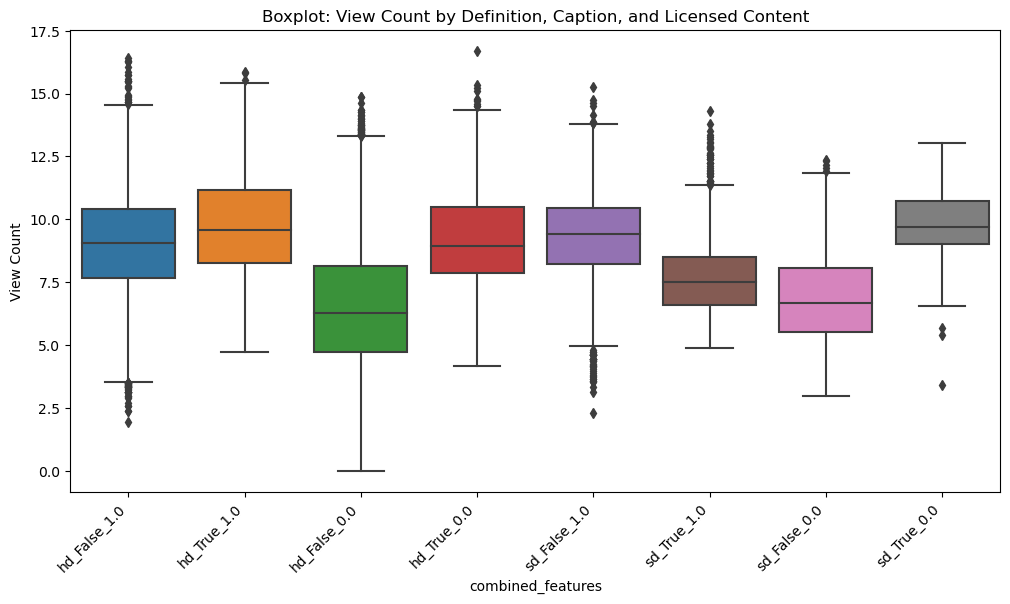

In [ ]:
# Boxplot of viewCount by combined categories of definition, caption, and licensedContent
plt.figure(figsize=(12, 6))
sns.boxplot(x='combined_features', y=np.log(data2['viewCount']), data=data2)
plt.title('Boxplot: View Count by Definition, Caption, and Licensed Content')
plt.xlabel('combined_features')
plt.ylabel('View Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='hour', ylabel='viewCount'>

Text(0.5, 1.0, 'Average View Count by Hour of the Day')

Text(0.5, 0, 'Hour of the Day')

Text(0, 0.5, 'Average View Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

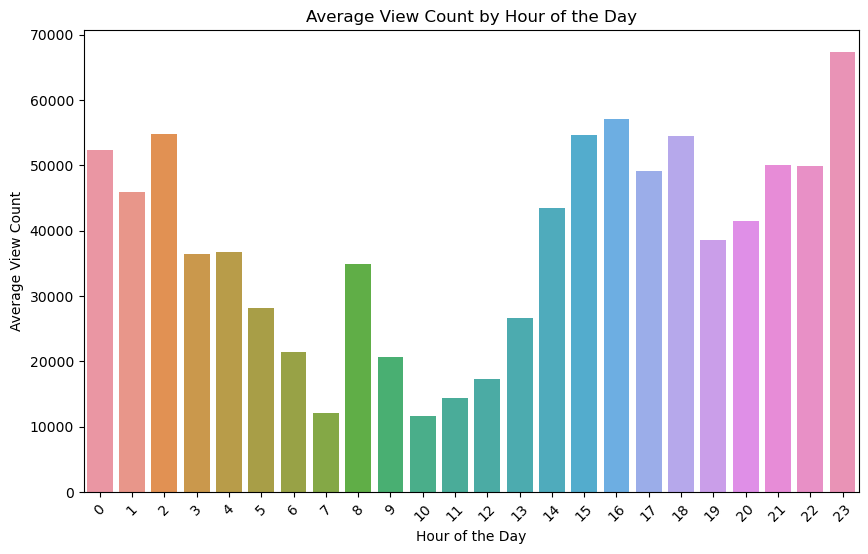

In [ ]:
# Group by hour of the day and calculate average view count
avg_viewcount_by_hour = data.groupby('hour')['viewCount'].mean().reset_index()

# average view count by hour of the day
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='viewCount', data=avg_viewcount_by_hour)
plt.title('Average View Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average View Count')
plt.xticks(rotation=45)
plt.show()
#month,day, hour

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='day', ylabel='viewCount'>

Text(0.5, 1.0, 'Average View Count by Day')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Average View Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31')])

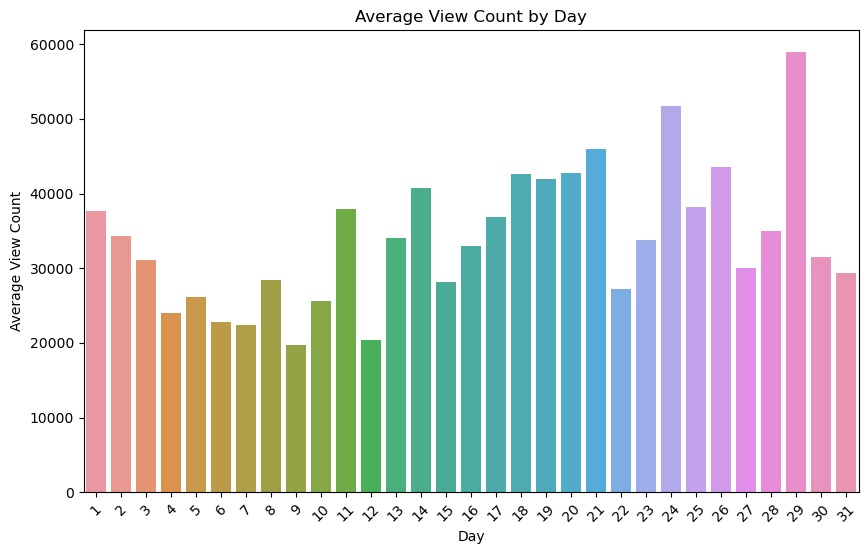

In [ ]:
# Group by day of the week and calculate average view count
avg_viewcount_by_day = data.groupby('day')['viewCount'].mean().reset_index()

# Plot average view count by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='viewCount', data=avg_viewcount_by_day)
plt.title('Average View Count by Day')
plt.xlabel('Day')
plt.ylabel('Average View Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='month', ylabel='viewCount'>

Text(0.5, 1.0, 'Average View Count by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average View Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

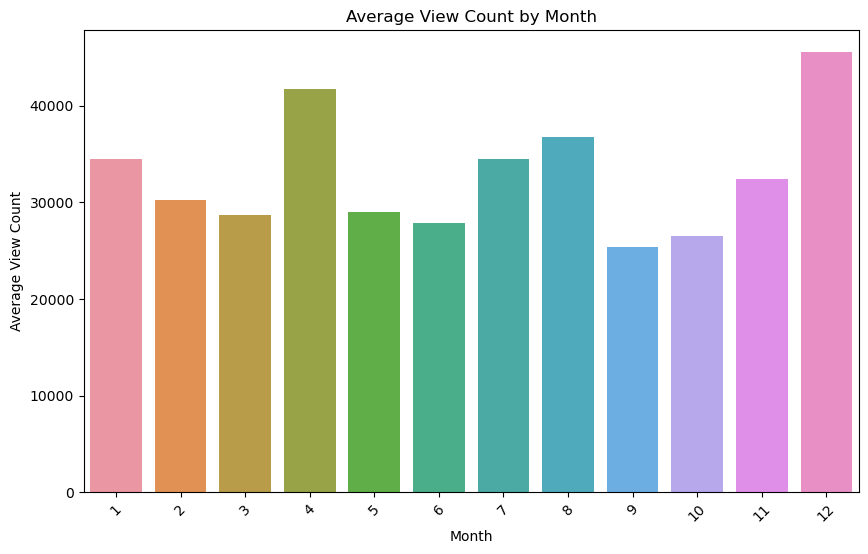

In [ ]:
# Group by month and calculate average view count
avg_viewcount_by_month = data.groupby('month')['viewCount'].mean().reset_index()

# Plot average view count by month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='viewCount', data=avg_viewcount_by_month)
plt.title('Average View Count by Month')
plt.xlabel('Month')
plt.ylabel('Average View Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='daysOfWeek', ylabel='viewCount'>

Text(0.5, 1.0, 'Average View Count by Day of the Week')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Average View Count')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

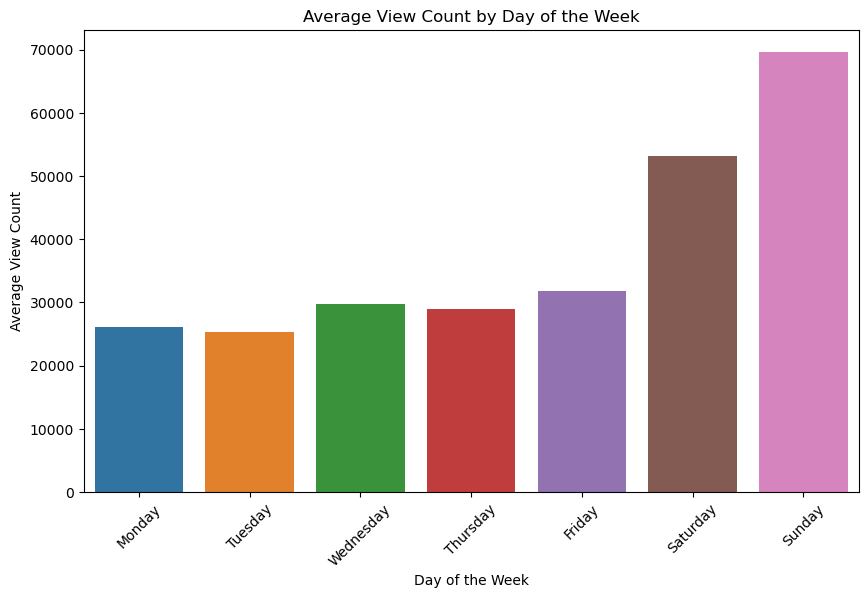

In [ ]:
# Group by day of the week and calculate average view count
avg_viewcount_by_day_of_week = data.groupby('daysOfWeek')['viewCount'].mean().reset_index()

# Plot average view count by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='daysOfWeek', y='viewCount', data=avg_viewcount_by_day_of_week, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average View Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average View Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
datanum = data[["viewCount","likeCount","dislikeCount","commentCount","favoriteCount"]]

In [ ]:
datanum.describe()

viewCount      likeCount  dislikeCount  commentCount  favoriteCount
count  4.425800e+04   44258.000000  44258.000000  44258.000000        44258.0
mean   3.238338e+04     528.287315     14.894143     37.631682            0.0
std    2.288052e+05    5881.939899    145.034108    345.840535            0.0
min    0.000000e+00      -1.000000     -1.000000     -1.000000            0.0
25%    3.070000e+02       2.000000      0.000000      0.000000            0.0
50%    2.261500e+03      17.000000      1.000000      1.000000            0.0
75%    1.289650e+04     121.000000      5.000000     13.000000            0.0
max    1.778718e+07  432355.000000  12563.000000  25774.000000            0.0

In [ ]:
views1 = np.percentile(data['viewCount'],0)
#views10 = np.percentile(data['viewCount'],10)
views20 = np.percentile(data['viewCount'],20)
#views30 = np.percentile(data['viewCount'],30)
views40 = np.percentile(data['viewCount'],40)
#views50 = np.percentile(data['viewCount'],50)
views60 = np.percentile(data['viewCount'],60)
#views70 = np.percentile(data['viewCount'],70)
views80 = np.percentile(data['viewCount'],80)
#views90 = np.percentile(data['viewCount'],90)
views99 = np.percentile(data['viewCount'],100)

#bins = [views1, views10, views20, views30, views40, views50, views60, views70, views80, views90, views99]
bins = [views1, views20, views40, views60, views80, views99]
labels = [0,1,2,3,4]

datanum['viewCategory'] = pd.cut(data['viewCount'], bins=bins, labels=labels, right=False, include_lowest=True)

In [ ]:
datanum.groupby("viewCategory")["viewCount"].mean()

viewCategory
0        81.914515
1       526.926477
2      2420.581093
3      9872.552480
4    146998.003502
Name: viewCount, dtype: float64

Text(0.5, 1.0, 'Average View Count by View Category')

Text(0.5, 0, 'View Category')

Text(0, 0.5, 'Mean View Count')

[Text(0, 0, '20th%'),
 Text(1, 0, '40th%'),
 Text(2, 0, '60th%'),
 Text(3, 0, '80th%'),
 Text(4, 0, '100th%')]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '20th%'),
  Text(1, 0, '40th%'),
  Text(2, 0, '60th%'),
  Text(3, 0, '80th%'),
  Text(4, 0, '100th%')])

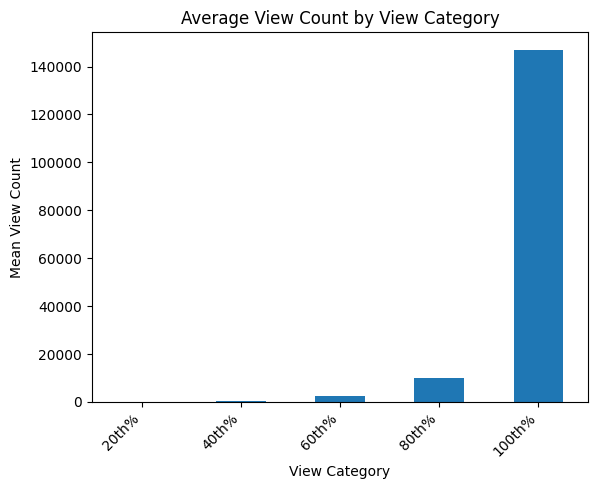

In [ ]:
plot = datanum.groupby(by="viewCategory")["viewCount"].mean().plot(kind = 'bar')
plt.title('Average View Count by View Category')
plt.xlabel('View Category')
plt.ylabel('Mean View Count')
new_xticklabels = ['20th%','40th%', '60th%', '80th%', '100th%']  # Replace with your desired labels
plot.set_xticklabels(new_xticklabels)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
datanum[['likeCount', 'dislikeCount', 'commentCount']].corr()

likeCount  dislikeCount  commentCount
likeCount      1.000000      0.821131      0.932493
dislikeCount   0.821131      1.000000      0.803898
commentCount   0.932493      0.803898      1.000000

In [ ]:
datanum['Engagement'] = datanum["likeCount"] + datanum["dislikeCount"] + datanum["commentCount"]
datanum2 = datanum[["viewCount","viewCategory","Engagement"]]
datanum2["LogEngagement"] = np.log(datanum2['Engagement'])

<ipython-input-29-ca38d33ed821>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanum['Engagement'] = datanum["likeCount"] + datanum["dislikeCount"] + datanum["commentCount"]
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-29-ca38d33ed821>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Text(0.5, 1.0, 'Engagement by View Category')

Text(0.5, 28.999999999999986, 'View Category')

Text(29.68780864197531, 0.5, 'Engagement')

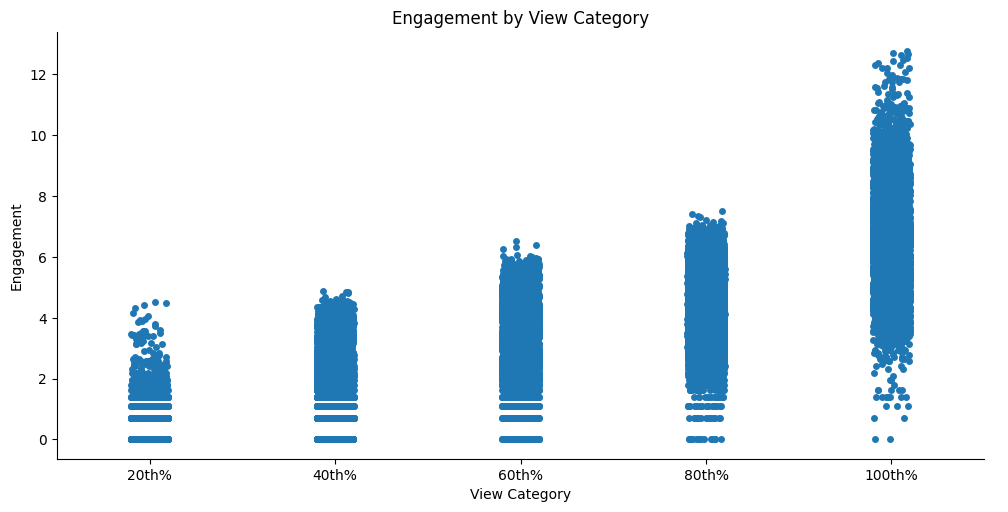

In [ ]:
#Adjust labels so that they are readable (not variable names)
# use set - > x/ylabel to adjust axis label
plot = sns.catplot(data = datanum2, x = "viewCategory", y = "LogEngagement", aspect = 2)
plt.title('Engagement by View Category')
plt.xlabel('View Category')
plt.ylabel('Engagement')
new_xticklabels = ['20th%','40th%', '60th%', '80th%', '100th%']
plot.set_xticklabels(new_xticklabels)
plt.show()

C:\Users\anson\AppData\Local\Temp\ipykernel_25764\2506482077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanum['LikeDislikeRatio'] = (datanum.likeCount)/(datanum.dislikeCount+0.1)
c:\Users\anson\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\anson\AppData\Local\Temp\ipykernel_25764\2506482077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanum["LikeDislikeRatioLog"] = 

Text(0.5, 1.0, 'Like/Dislike Ratio by View Category')

Text(0.5, 9.444444444444438, 'View Category')

Text(11.069444444444445, 0.5, 'Like/Dislike Ratio')

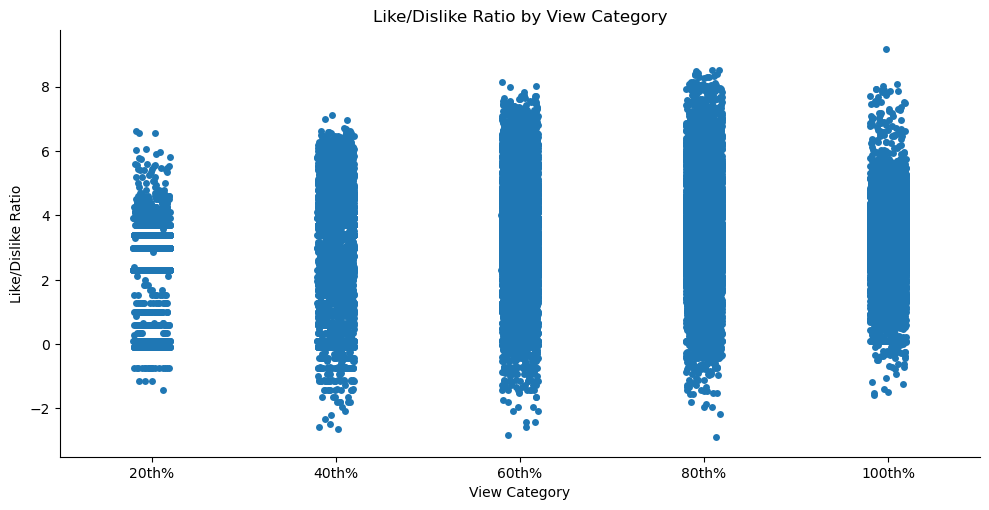

In [ ]:
datanum['LikeDislikeRatio'] = (datanum.likeCount)/(datanum.dislikeCount+0.1)
datanum["LikeDislikeRatioLog"] = np.log(datanum.LikeDislikeRatio)

plot = sns.catplot(data = datanum, x = "viewCategory", y = "LikeDislikeRatioLog", aspect = 2)
plt.title('Like/Dislike Ratio by View Category')
plt.xlabel('View Category')
plt.ylabel('Like/Dislike Ratio')
new_xticklabels = ['20th%','40th%', '60th%', '80th%', '100th%']
plot.set_xticklabels(new_xticklabels)
plt.show()

<Axes: xlabel='channelTitle'>

Text(0.5, 0, 'Channel Title')

Text(0, 0.5, 'Mean View Count (Log Scale)')

Text(0.5, 1.0, 'Mean View Count by Channel Title and Video Category')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Code Bullet'),
  Text(1, 0, '3Blue1Brown'),
  Text(2, 0, 'Keith Galli'),
  Text(3, 0, 'Luis Serrano'),
  Text(4, 0, 'Corey Schafer'),
  Text(5, 0, 'Leila Gharani'),
  Text(6, 0, 'sentdex'),
  Text(7, 0, 'Siraj Raval'),
  Text(8, 0, 'Chandoo'),
  Text(9, 0, 'StatQuest with Josh Starmer'),
  Text(10, 0, 'freeCodeCamp.org'),
  Text(11, 0, 'Telusko')])

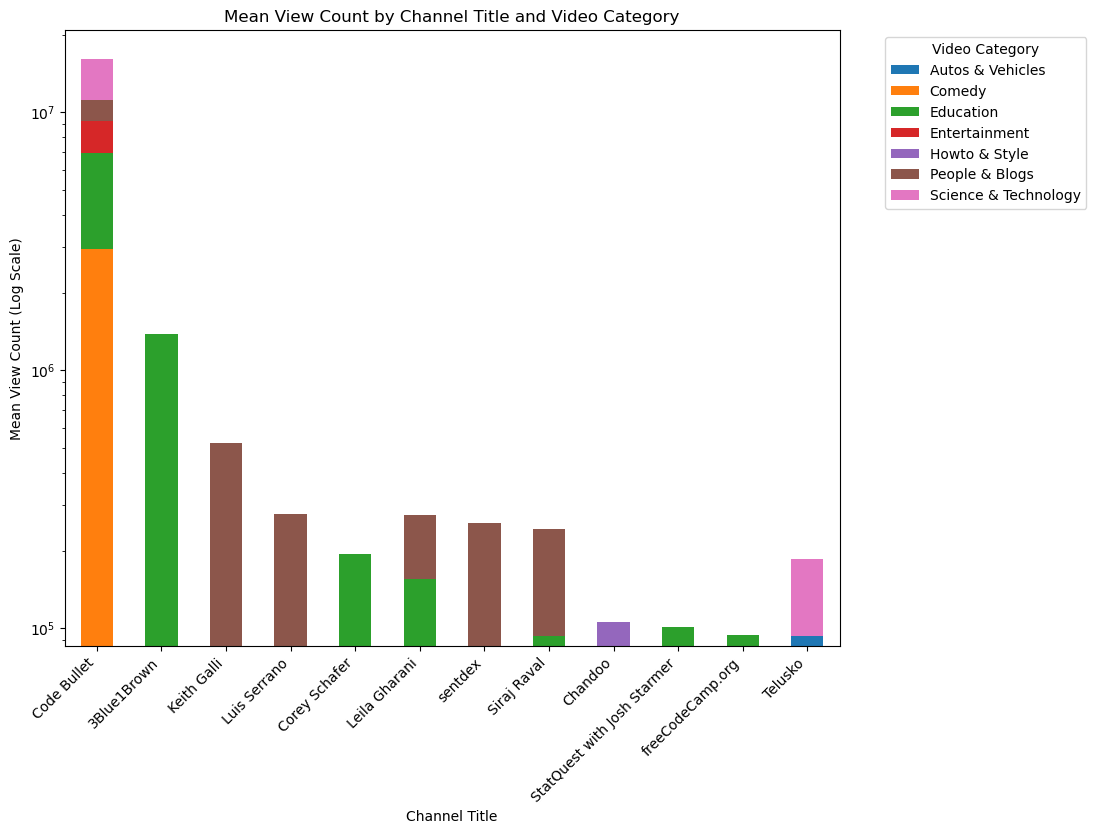

In [ ]:
# Assuming 'data' is your DataFrame
grouped_data = data.groupby(["channelTitle", "videoCategoryLabel"])["viewCount"].mean().nlargest(20)

# Unstack the grouped data to create a DataFrame suitable for a stacked bar chart
stacked_data = grouped_data.unstack()

# Sort the DataFrame by the x-axis values (channelTitle)
stacked_data = stacked_data.reindex(stacked_data.mean(axis=1).sort_values(ascending=False).index)

# Plot the stacked bar chart with a logarithmic scale on the y-axis
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.xlabel("Channel Title")
plt.ylabel("Mean View Count (Log Scale)")
plt.title("Mean View Count by Channel Title and Video Category")
plt.legend(title="Video Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# Set a logarithmic scale on the y-axis
plt.yscale('log')

plt.show()

<Axes: xlabel='channelTitle'>

Text(0.5, 0, 'Channel Title')

Text(0, 0.5, 'Mean View Count (Log Scale)')

Text(0.5, 1.0, 'Mean View Count by Channel Title and Video Category')

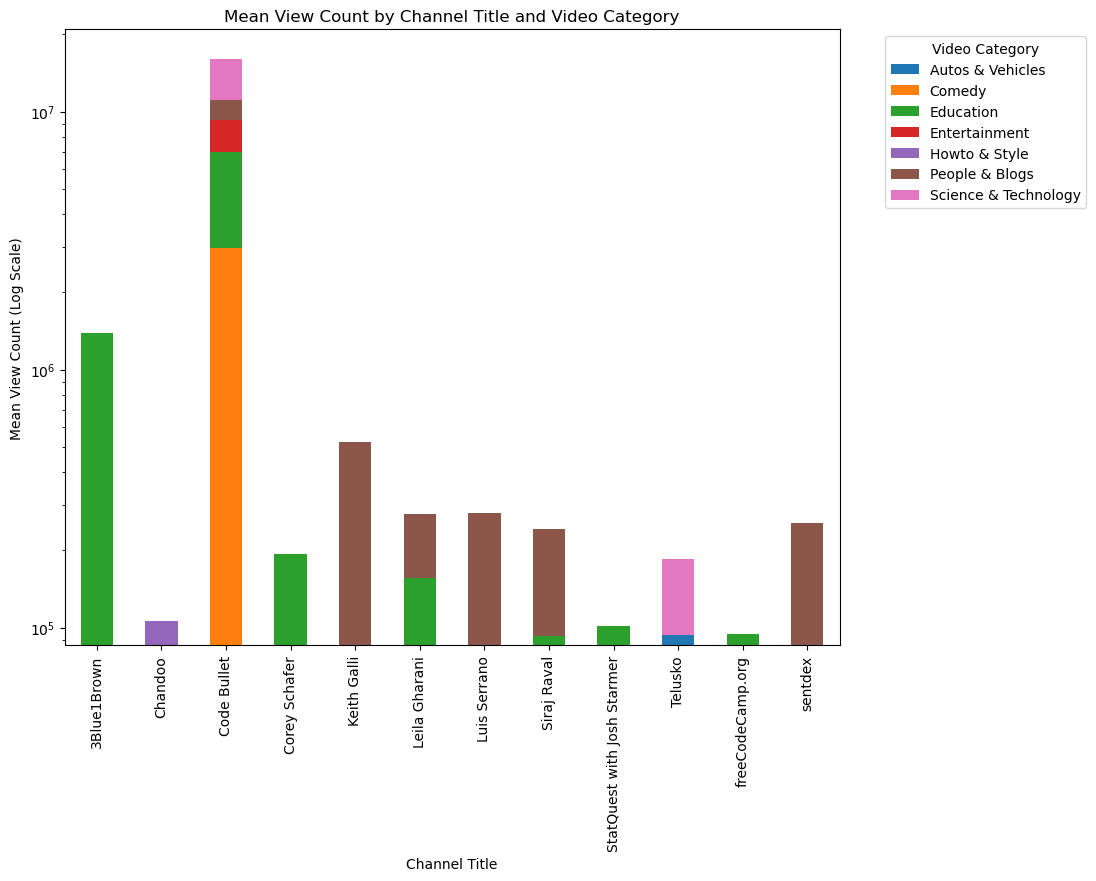

In [ ]:
# Assuming 'data' is your DataFrame
grouped_data = data.groupby(["channelTitle", "videoCategoryLabel"])["viewCount"].mean().nlargest(20)

# Unstack the grouped data to create a DataFrame suitable for a stacked bar chart
stacked_data = grouped_data.unstack()

# Plot the stacked bar chart with a logarithmic scale on the y-axis
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.xlabel("Channel Title")
plt.ylabel("Mean View Count (Log Scale)")
plt.title("Mean View Count by Channel Title and Video Category")
plt.legend(title="Video Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Set a logarithmic scale on the y-axis
plt.yscale('log')

plt.show()

<Axes: xlabel='channelTitle'>

Text(0.5, 0, 'Mean View Count')

Text(0, 0.5, 'Channel Title')

Text(0.5, 1.0, 'Mean View Count by Channel Title and Video Category')

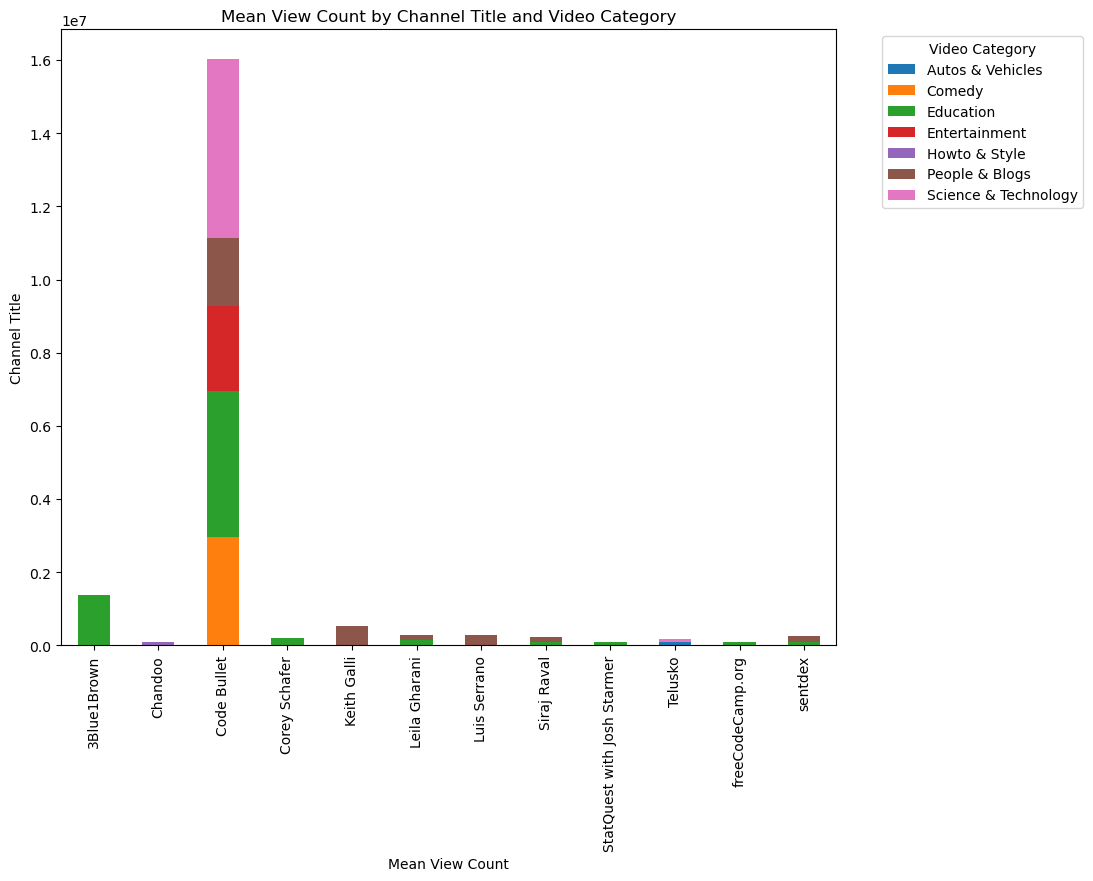

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
grouped_data = data.groupby(["channelTitle", "videoCategoryLabel"])["viewCount"].mean().nlargest(20)

# Unstack the grouped data to create a DataFrame suitable for a stacked bar chart
stacked_data = grouped_data.unstack()

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.xlabel("Mean View Count")
plt.ylabel("Channel Title")
plt.title("Mean View Count by Channel Title and Video Category")
plt.legend(title="Video Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Feature Engineer

In [19]:
import datetime as dt

# Convert 'publishedAt' column to datetime format
data['publishedAt'] = pd.to_datetime(data['publishedAt'])

# Extract date, hour, minute, and second components
data['date'] = data['publishedAt'].dt.date
data['hour'] = data['publishedAt'].dt.hour
data['month'] = data['publishedAt'].dt.month
data['year'] = data['publishedAt'].dt.year
data['daysOfWeek'] = data['publishedAt'].dt.day_name()

# Get today's date in UTC timezone
recent_date = max(data.publishedAt)

# Calculate the time difference in days from published date to today's date
data['days_since_published'] = (recent_date - data['publishedAt']).dt.days

In [20]:
views1 = np.percentile(data['viewCount'],0)
#views10 = np.percentile(data['viewCount'],10)
views20 = np.percentile(data['viewCount'],20)
#views30 = np.percentile(data['viewCount'],30)
views40 = np.percentile(data['viewCount'],40)
#views50 = np.percentile(data['viewCount'],50)
views60 = np.percentile(data['viewCount'],60)
#views70 = np.percentile(data['viewCount'],70)
views80 = np.percentile(data['viewCount'],80)
#views90 = np.percentile(data['viewCount'],90)
views99 = np.percentile(data['viewCount'],100)

#bins = [views1, views10, views20, views30, views40, views50, views60, views70, views80, views90, views99]
bins = [views1, views20, views40, views60, views80, views99]
labels = [0,1,2,3,4]

data['viewCategory'] = pd.cut(data['viewCount'], bins=bins, labels=labels, right=False, include_lowest=True)

In [21]:
data[data['viewCategory'].isna()]["viewCount"]

18960    17787179.0
Name: viewCount, dtype: float64

In [22]:
data.iloc[data['viewCount'].idxmax()]

channelId                                        UC8butISFwT-Wl7EV0hUK0BQ
channelTitle                                             freeCodeCamp.org
videoId                                                       rfscVS0vtbw
publishedAt                                     2018-07-11 18:00:42+00:00
publishedAtSQL                                              11/7/18 18:00
videoTitle              Learn Python - Full Course for Beginners [Tuto...
videoDescription        This course will give you a full introduction ...
videoCategoryId                                                      27.0
videoCategoryLabel                                              Education
duration                                                       PT4H26M52S
durationSec                                                        1612.0
dimension                                                              2d
definition                                                             hd
caption                               

In [23]:
data.loc[data['viewCategory'].isna(), 'viewCategory'] = 4

In [24]:
data["viewCategory"].isna().sum()

0

In [25]:
def hour_to_sin_cos(hour, max_hour=24):
    theta = 2 * np.pi * hour / max_hour
    sin_value = np.sin(theta)
    cos_value = np.cos(theta)
    return sin_value, cos_value

# Apply sin and cos transformation
data['sin_hour'], data['cos_hour'] = zip(*data['hour'].apply(hour_to_sin_cos))


In [26]:
data

channelId   channelTitle      videoId  \
0      UCkndrGoNpUDV-uia6a9jwVg     ExcelIsFun  Z2Cy9IY7IBA   
1      UCkndrGoNpUDV-uia6a9jwVg     ExcelIsFun  oS_tUs51T0A   
2      UCkndrGoNpUDV-uia6a9jwVg     ExcelIsFun  yvmdIX9ZsPA   
3      UCkndrGoNpUDV-uia6a9jwVg     ExcelIsFun  08kgJ8WM_Q0   
4      UCkndrGoNpUDV-uia6a9jwVg     ExcelIsFun  h-qLNikIs-0   
...                         ...            ...          ...   
44256  UCPsUUDUlcTJuP-fRa7z85aQ  KDD2016 video  RoUrdoU_2F4   
44257  UCPsUUDUlcTJuP-fRa7z85aQ  KDD2016 video  XNf7gBGEq28   
44258  UCPsUUDUlcTJuP-fRa7z85aQ  KDD2016 video  LIBLD8NM04Y   
44259  UCPsUUDUlcTJuP-fRa7z85aQ  KDD2016 video  _s3p4s9dUCU   
44260  UCPsUUDUlcTJuP-fRa7z85aQ  KDD2016 video  l2IlkEC0-hk   

                    publishedAt publishedAtSQL  \
0     2020-08-20 20:39:38+00:00  20/8/20 20:39   
1     2020-08-17 21:23:13+00:00  17/8/20 21:23   
2     2020-08-14 15:02:25+00:00  14/8/20 15:02   
3     2020-08-10 19:13:08+00:00  10/8/20 19:13   
4     2020-08-03 22:44:45+00:00   3/8/20 22:44   
...                         ...            ...   
44256 2016-06-30 17:20:11+00:00  30/6/16 17:20   
44257 2016-06-30 17:20:10+00:00  30/6/16 17:20   
44258 2016-06-30 17:20:09+00:00  30/6/16 17:20   
44259 2016-06-30 17:20:09+00:00  30/6/16 17:20   
44260 2016-06-30 17:20:08+00:00  30/6/16 17:20   

                                              videoTitle  \
0      Add 500 to All Numbers in Text String? LET or ...   
1      Dynamic Excel Multiplication Table with Condit...   
2      Dueling Excel #191: Net Working Hours Spanning...   
3      Append Two Number Columns and Sort. Excel Magi...   
4      LET Function Advanced Array Formula for Dynami...   
...                                                  ...   
44256                                 KDD2016 paper 1202   
44257                                 KDD2016 paper 1227   
44258                                 KDD2016 paper 1236   
44259                                  KDD2016 paper 958   
44260                                  KDD2016 paper 799   

                                        videoDescription  videoCategoryId  \
0      Download Excel File: http://excelisfun.net/fil...             27.0   
1      Download Excel File: http://excelisfun.net/fil...             27.0   
2      Download Excel File: http://excelisfun.net/fil...             27.0   
3      Download Excel File: http://excelisfun.net/fil...             27.0   
4      Download Excel File: http://excelisfun.net/fil...             27.0   
...                                                  ...              ...   
44256  Title: Sampling of Attributed Networks from Hi...             22.0   
44257  Title: Identifying Earmarks in Congressional B...             22.0   
44258  Title: Online Feature Selection: A Limited-Mem...             22.0   
44259  Title: Scalable Betweenness Centrality Maximiz...             22.0   
44260  Title: Identifying Earmarks in Congressional B...             22.0   

      videoCategoryLabel  duration  ...        date hour month  year day  \
0              Education  PT11M51S  ...  2020-08-20   20     8  2020  20   
1              Education   PT7M59S  ...  2020-08-17   21     8  2020  17   
2              Education  PT17M11S  ...  2020-08-14   15     8  2020  14   
3              Education   PT5M10S  ...  2020-08-10   19     8  2020  10   
4              Education  PT14M32S  ...  2020-08-03   22     8  2020   3   
...                  ...       ...  ...         ...  ...   ...   ...  ..   
44256     People & Blogs   PT2M57S  ...  2016-06-30   17     6  2016  30   
44257     People & Blogs   PT3M15S  ...  2016-06-30   17     6  2016  30   
44258     People & Blogs   PT2M51S  ...  2016-06-30   17     6  2016  30   
44259     People & Blogs   PT2M19S  ...  2016-06-30   17     6  2016  30   
44260     People & Blogs    PT2M4S  ...  2016-06-30   17     6  2016  30   

       daysOfWeek  days_since_published  viewCategory  sin_hour  cos_hour  
0        Thursday            

# Model: Data Setup

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44258 entries, 0 to 44260
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   channelId             44258 non-null  object             
 1   channelTitle          44258 non-null  object             
 2   videoId               44258 non-null  object             
 3   publishedAt           44258 non-null  datetime64[ns, UTC]
 4   publishedAtSQL        44258 non-null  object             
 5   videoTitle            44258 non-null  object             
 6   videoDescription      43776 non-null  object             
 7   videoCategoryId       44258 non-null  float64            
 8   videoCategoryLabel    44258 non-null  object             
 9   duration              44258 non-null  object             
 10  durationSec           44258 non-null  float64            
 11  dimension             44258 non-null  object             
 12  defi

In [27]:
col_num = ["durationSec","likeCount","dislikeCount","commentCount","days_since_published","sin_hour","cos_hour"]
col_cat = ["channelTitle","videoCategoryLabel","definition","caption","licensedContent","comment_error","like_dislike_error","daysOfWeek","month","year"]

# Assuming 'viewCategory' is your target variable
y = 'viewCategory'

# Concatenating numerical, categorical, and target variable into m_data
m_data = data[col_num + col_cat + [y]]
m_data.info()
m_data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44258 entries, 0 to 44260
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   durationSec           44258 non-null  float64 
 1   likeCount             44258 non-null  float64 
 2   dislikeCount          44258 non-null  float64 
 3   commentCount          44258 non-null  float64 
 4   days_since_published  44258 non-null  int64   
 5   sin_hour              44258 non-null  float64 
 6   cos_hour              44258 non-null  float64 
 7   channelTitle          44258 non-null  object  
 8   videoCategoryLabel    44258 non-null  object  
 9   definition            44258 non-null  object  
 10  caption               44258 non-null  object  
 11  licensedContent       18811 non-null  float64 
 12  comment_error         44258 non-null  int64   
 13  like_dislike_error    44258 non-null  int64   
 14  daysOfWeek            44258 non-null  object  
 15  mo

(44258, 18)

In [29]:
# Read the text file into a pandas DataFrame
#file_path = '/content/drive/MyDrive/Colab Notebooks/index_values.txt'
file_path = '/content/drive/MyDrive/index_values.txt'

# Read CSV into a DataFrame
loaded_index_data = pd.read_csv(file_path, header=None, names=['index'])


#loaded_index_data = pd.read_csv("index_values.txt", header=None, names=['index'])
loaded_index_data["index"]

0            7
1           16
2           18
3           38
4           43
         ...  
34187    44256
34188    44257
34189    44258
34190    44259
34191    44260
Name: index, Length: 34192, dtype: int64

In [30]:
m_data = m_data.loc[loaded_index_data["index"]]

In [31]:
m_data

durationSec  likeCount  dislikeCount  commentCount  \
7            710.0      443.0           3.0          88.0   
16           368.0      527.0           3.0         115.0   
18           506.0      834.0           8.0         116.0   
38           266.0      275.0           3.0          74.0   
43           395.0      296.0           2.0          65.0   
...            ...        ...           ...           ...   
44256        177.0        4.0           0.0           0.0   
44257        195.0        0.0           0.0           0.0   
44258        171.0        1.0           0.0           0.0   
44259        139.0       23.0           0.0           1.0   
44260        124.0        1.0           0.0           0.0   

       days_since_published  sin_hour  cos_hour   channelTitle  \
7                        48  0.000000  1.000000     ExcelIsFun   
16                      103 -0.965926  0.258819     ExcelIsFun   
18                      110 -0.707107  0.707107     ExcelIsFun   
38                      159 -0.500000  0.866025     ExcelIsFun   
43                      170  0.500000  0.866025     ExcelIsFun   
...                     ...       ...       ...            ...   
44256                  1519 -0.965926 -0.258819  KDD2016 video   
44257                  1519 -0.965926 -0.258819  KDD2016 video   
44258                  1519 -0.965926 -0.258819  KDD2016 video   
44259                  1519 -0.965926 -0.258819  KDD2016 video   
44260                  1519 -0.965926 -0.258819  KDD2016 video   

      videoCategoryLabel definition caption  licensedContent  comment_error  \
7              Education         hd   False              1.0              0   
16             Education         hd   False              1.0              0   
18             Education         hd   False              1.0              0   
38             Education         hd   False              1.0              0   
43             Education         hd   False              1.0              0   
...                  ...        ...     ...              ...            ...   
44256     People & Blogs         hd   False              NaN              0   
44257     People & Blogs         hd   False              NaN              0   
44258     People & Blogs         hd   False              NaN              0   
44259     People & Blogs         hd   False              NaN              0   
44260     People & Blogs         hd   False              NaN              0   

       like_dislike_error daysOfWeek  month  year viewCategory  
7                       0   Saturday      7  2020            3  
16                      0   Saturday      5  2020            3  
18                      0   Saturday      5  2020            3  
38                      0   Saturday      3  2020            3  
43                      0  Wednesday      3  2020            2  
...                   ...        ...    ...   ...          ...  
44256                   0   Thursday      6  2016            1  
44257                   0   Thursday      6  2016            0  
44258                   0   Thursday      6  2016            1  
44259                   0   Thursday      6  2016            2  
44260                   0   Thursday      6  2016            0  

[34192 rows x 18 columns]

# Comprehensive Approach

In [32]:
m_data['licensedContent'] = m_data['licensedContent'].astype(str)
m_data['comment_error'] = m_data['comment_error'].astype(str)
m_data['like_dislike_error'] = m_data['like_dislike_error'].astype(str)
m_data['month'] = m_data['month'].astype(str)
m_data['year'] = m_data['year'].astype(str)

## Decision Tree

In [37]:
#Split training/test data
X_train, X_test, y_train, y_test = train_test_split(m_data.drop("viewCategory", axis=1), m_data["viewCategory"],test_size =0.1
                                                    ,random_state=0)

In [38]:
#Make pipeline
pipe_cat = make_pipeline(SimpleImputer(strategy='constant'),
                         OneHotEncoder(handle_unknown="ignore"))
pipe_num = make_pipeline(SimpleImputer())
preprocessor = make_column_transformer( (pipe_cat,col_cat) , (pipe_num,col_num) )

In [ ]:
from sklearn.tree import DecisionTreeClassifier
pipe = make_pipeline(preprocessor, DecisionTreeClassifier(criterion='entropy'))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {"decisiontreeclassifier__max_depth":range(1, 10)}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['channelTitle',
                                                                          'videoCategoryLabel',
                                                                          'definition',
                                                                          'caption',
                                                                          'licensedContent',
                                                                          'comment_error',
                                                                          'like_dislike_err...
                                                                          'daysOfWeek',
                                                                          'month',
                                                                          'year']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         ['durationSec',
                                                                          'likeCount',
                                                                          'dislikeCount',
                                                                          'commentCount',
                                                                          'days_since_published',
                                                                          'sin_hour',
                                                                          'cos_hour'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(criterion='entropy'))]),
             param_grid={'decisiontreeclassifier__max_depth': range(1, 10)},
             return_train_score=True)

In [ ]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.348993      0.135088         0.067865        0.019408   
1       0.384242      0.136886         0.074102        0.029812   
2       0.168324      0.015285         0.033920        0.006097   
3       0.191232      0.006406         0.031266        0.001974   
4       0.230822      0.012293         0.035040        0.005442   
5       0.274995      0.003655         0.032348        0.001539   
6       0.490923      0.183591         0.056654        0.021239   
7       0.577795      0.096737         0.044353        0.011258   
8       0.577732      0.020986         0.033730        0.003512   

  param_decisiontreeclassifier__max_depth  \
0                                       1   
1                                       2   
2                                       3   
3                                       4   
4                                       5   
5                                       6   
6                                       7   
7                                       8   
8                                       9   

                                     params  split0_test_score  \
0  {'decisiontreeclassifier__max_depth': 1}           0.412185   
1  {'decisiontreeclassifier__max_depth': 2}           0.586028   
2  {'decisiontreeclassifier__max_depth': 3}           0.607636   
3  {'decisiontreeclassifier__max_depth': 4}           0.630219   
4  {'decisiontreeclassifier__max_depth': 5}           0.690008   
5  {'decisiontreeclassifier__max_depth': 6}           0.704955   
6  {'decisiontreeclassifier__max_depth': 7}           0.730301   
7  {'decisiontreeclassifier__max_depth': 8}           0.737449   
8  {'decisiontreeclassifier__max_depth': 9}           0.747360   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.412510           0.412252           0.412415  ...   
1           0.585865           0.588073           0.575236  ...   
2           0.625183           0.626422           0.608385  ...   
3           0.654915           0.660546           0.641371  ...   
4           0.686109           0.702470           0.692720  ...   
5           0.716328           0.710595           0.710757  ...   
6           0.724939           0.726194           0.727332  ...   
7           0.737287           0.735944           0.737894  ...   
8           0.744435           0.739519           0.745206  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.412323        0.000120                9            0.412520   
1         0.585857        0.006090                8            0.585043   
2         0.617964        0.008246                7            0.616810   
3         0.650527        0.012981                6            0.638217   
4         0.691928        0.005696                5            0.695170   
5         0.709931        0.003880                4            0.720925   
6         0.726310        0.002502                3            0.742129   
7         0.735961        0.002453                2            0.759069   
8         0.742005        0.004965                1            0.783199   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.412317            0.412503            0.412462   
1            0.591664            0.588797            0.582785   
2            0.630337            0.629661            0.613047   
3            0.666734            0.659599            0.642863   
4            0.700370            0.703956            0.701113   
5            0.727790            0.721261            0.722398   
6            0.743511            0.739134            0.741896   
7            0.762847            0.761841            0.762369   
8            0.783320            0.777561            0.783654   

   split4_train_score  mean_train_score  std_train_score  
0            0.412016          0.412364         0.000188  
1            0.590544        

In [ ]:
print(f"The best parameters on validation set is: {grid.best_params_}")
print("accuracy on train set: %f" % grid.score(X_train, y_train))
print("accuracy on test set: %f" % grid.score(X_test, y_test))

The best parameters on validation set is: {'decisiontreeclassifier__max_depth': 9}
accuracy on train set: 0.777915
accuracy on test set: 0.747076


In [ ]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score',
                     index='param_decisiontreeclassifier__max_depth')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))
res

mean_test_score
1            0.412
2            0.586
3            0.618
4            0.651
5            0.692
6            0.710
7            0.726
8            0.736
9            0.742

<Axes: >

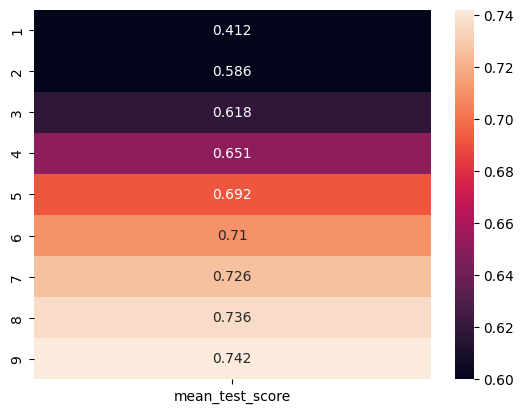

In [ ]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

<Axes: xlabel='param_decisiontreeclassifier__max_depth', ylabel='mean_test_score'>

Text(0.5, 0, 'Max Depth')

Text(0, 0.5, 'Mean Test Score')

Text(0.5, 1.0, 'Grid Search Results')

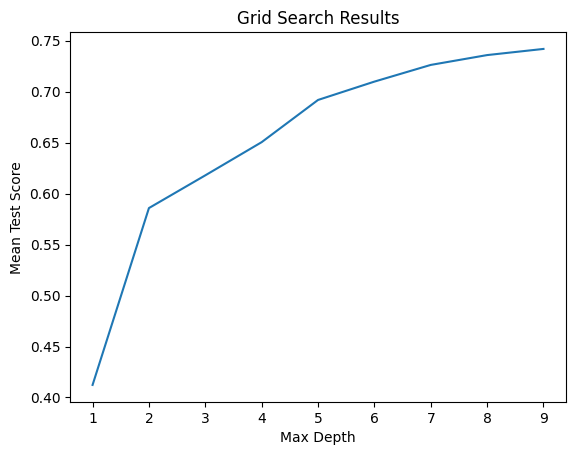

In [ ]:
sns.lineplot(x='param_decisiontreeclassifier__max_depth', y='mean_test_score', data=grid.cv_results_)
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.show()

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['channelTitle',
                                                   'videoCategoryLabel',
                                                   'definition', 'caption',
                                                   'licensedContent',
                                                   'comment_error',
                                                   'like_dislike_error',
                                                   'daysOfWeek', 'month',
                                                   'year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['durationSec', 'likeCount',
                                                   'dislikeCount',
                                                   'commentCount',
                                                   'days_since_published',
                                                   'sin_hour', 'cos_hour'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6))])

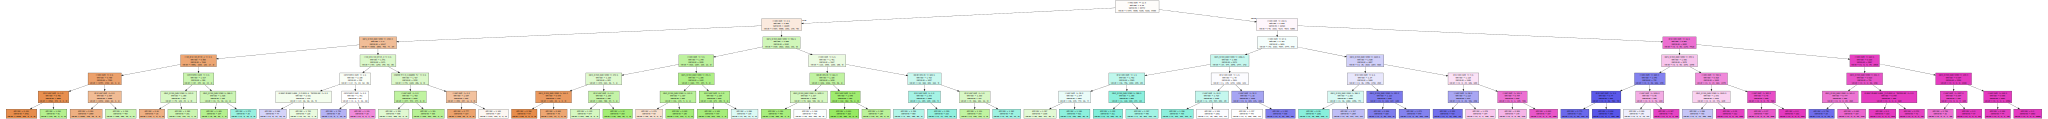

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
tree = DecisionTreeClassifier(max_depth=6, criterion='entropy')
pipe_tree = make_pipeline(preprocessor,tree)
pipe_tree.fit(X_train, y_train)
feature_names = preprocessor.named_transformers_['pipeline-1'].named_steps['onehotencoder'].get_feature_names_out(input_features=col_cat).tolist()
feature_names = feature_names+col_num
# Visualize the decision tree using Graphviz
tree_dot = export_graphviz(tree, out_file=None, feature_names=feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph

In [ ]:
tree = DecisionTreeClassifier(max_depth=6, criterion='entropy')
pipe_tree = make_pipeline(preprocessor,tree)
pipe_tree.fit(X_train, y_train)
feature_names = preprocessor.named_transformers_['pipeline-1'].named_steps['onehotencoder'].get_feature_names_out(input_features=col_cat).tolist()
feature_names = feature_names+col_num

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['channelTitle',
                                                   'videoCategoryLabel',
                                                   'definition', 'caption',
                                                   'licensedContent',
                                                   'comment_error',
                                                   'like_dislike_error',
                                                   'daysOfWeek', 'month',
                                                   'year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['durationSec', 'likeCount',
                                                   'dislikeCount',
                                                   'commentCount',
                                                   'days_since_published',
                                                   'sin_hour', 'cos_hour'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6))])

In [ ]:
best_model = grid.best_estimator_
dt_classifier = best_model.named_steps['decisiontreeclassifier']
feature_importances = dt_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 12 artists>

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Top 10% Feature Importances')

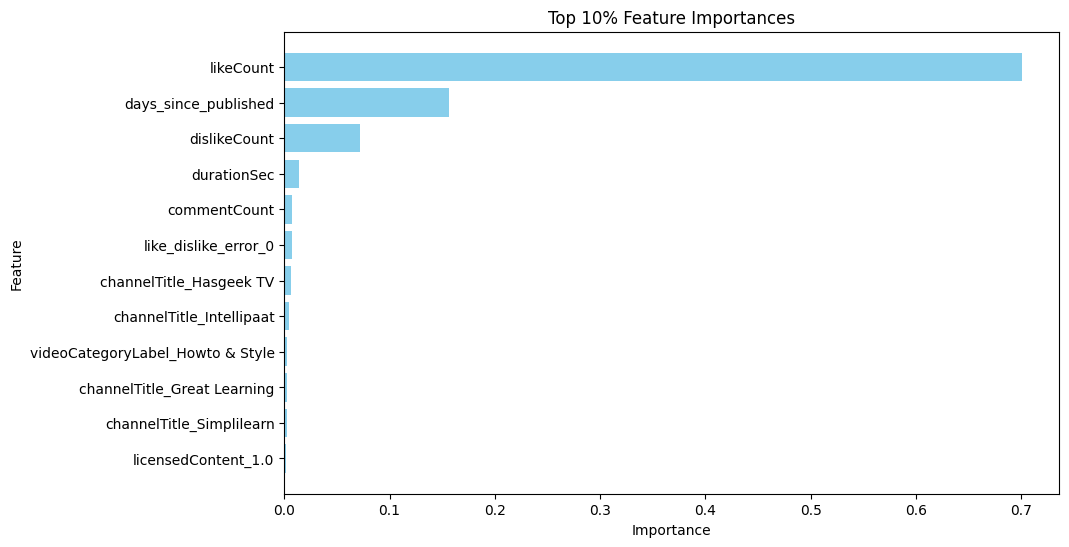

In [ ]:
num_features_to_keep = int(0.1 * len(importance_df))
top_features = importance_df.iloc[:num_features_to_keep]

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10% Feature Importances')
plt.gca().invert_yaxis()
plt.show()

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
pipe = make_pipeline(preprocessor, RandomForestClassifier())
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['channelTitle',
                                                   'videoCategoryLabel',
                                                   'definition', 'caption',
                                                   'licensedContent',
                                                   'comment_error',
                                                   'like_dislike_error',
                                                   'daysOfWeek', 'month',
                                                   'year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['durationSec', 'likeCount',
                                                   'dislikeCount',
                                                   'commentCount',
                                                   'days_since_published',
                                                   'sin_hour', 'cos_hour'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [71]:
np.set_printoptions(precision=6, suppress=True)
param_grid = {'randomforestclassifier__max_features': [4,8,12,16,20],
              'randomforestclassifier__max_depth': [6,8,10,12,14]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['channelTitle',
                                                                          'videoCategoryLabel',
                                                                          'definition',
                                                                          'caption',
                                                                          'licensedContent',
                                                                          'comment_error',
                                                                          'like_dislike_err...
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         ['durationSec',
                                                                          'likeCount',
                                                                          'dislikeCount',
                                                                          'commentCount',
                                                                          'days_since_published',
                                                                          'sin_hour',
                                                                          'cos_hour'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [6, 8, 10, 12,
                                                               14],
                         'randomforestclassifier__max_features': [4, 8, 12, 16,
                                                                  20]},
             return_train_score=True)

In [72]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.9681        0.1945           0.1078          0.0176   
1         1.3411        0.0869           0.0936          0.0018   
2         1.9020        0.3301           0.1114          0.0221   
3         2.5943        0.4414           0.1117          0.0215   
4         2.9646        0.3177           0.1153          0.0266   

  param_randomforestclassifier__max_depth  \
0                                       6   
1                                       6   
2                                       6   
3                                       6   
4                                       6   

  param_randomforestclassifier__max_features  \
0                                          4   
1                                          8   
2                                         12   
3                                         16   
4                                         20   

                                              params  split0_test_score  \
0  {'randomforestclassifier__max_depth': 6, 'rand...             0.6041   
1  {'randomforestclassifier__max_depth': 6, 'rand...             0.6362   
2  {'randomforestclassifier__max_depth': 6, 'rand...             0.6624   
3  {'randomforestclassifier__max_depth': 6, 'rand...             0.6833   
4  {'randomforestclassifier__max_depth': 6, 'rand...             0.7040   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0             0.6076             0.6001  ...           0.6048          0.0030   
1             0.6414             0.6331  ...           0.6379          0.0031   
2             0.6718             0.6534  ...           0.6649          0.0065   
3             0.6806             0.6877  ...           0.6850          0.0028   
4             0.7007             0.7030  ...           0.7020          0.0023   

   rank_test_score  split0_train_score  split1_train_score  \
0               25              0.6194              0.6160   
1               23              0.6490              0.6448   
2               21              0.6747              0.6818   
3               18              0.6924              0.6922   
4               15              0.7136              0.7139   

   split2_train_score  split3_train_score  split4_train_score  \
0              0.6200              0.6122              0.6210   
1              0.6470              0.6451              0.6498   
2              0.6662              0.6733              0.6768   
3              0.7023              0.6959              0.6960   
4              0.7136              0.7114              0.7138   

   mean_train_score  std_train_score  
0            0.6177           0.0032  
1            0.6472           0.0020  
2            0.6746           0.0051  
3            0.6957           0.0036  
4            0.7133           0.0009  

[5 rows x 22 columns]

In [73]:
print(f"The best parameters on validation set is: {grid.best_params_}")
print("accuracy on training set: %f" % grid.score(X_train, y_train))
print("accuracy on test set: %f" % grid.score(X_test, y_test))

The best parameters on validation set is: {'randomforestclassifier__max_depth': 14, 'randomforestclassifier__max_features': 20}
accuracy on training set: 0.877746
accuracy on test set: 0.770468


<Axes: xlabel='param_randomforestclassifier__max_depth', ylabel='mean_test_score'>

Text(0.5, 0, 'Max Depth')

Text(0, 0.5, 'Mean Test Score')

Text(0.5, 1.0, 'Grid Search Results')

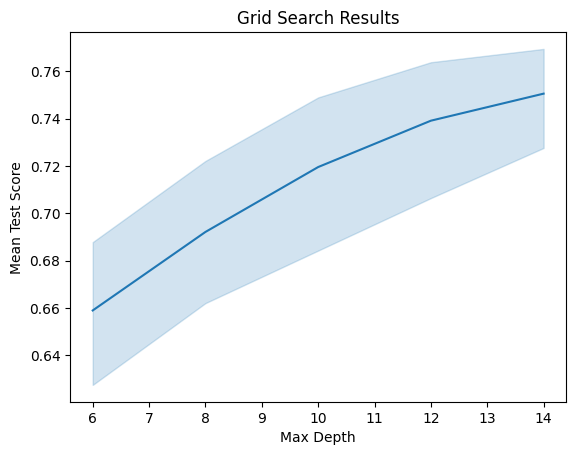

In [74]:
sns.lineplot(x='param_randomforestclassifier__max_depth', y='mean_test_score', data=grid.cv_results_)
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.show()

<Axes: xlabel='param_randomforestclassifier__max_features', ylabel='mean_test_score'>

Text(0.5, 0, 'Max Features')

Text(0, 0.5, 'Mean Test Score')

Text(0.5, 1.0, 'Grid Search Results')

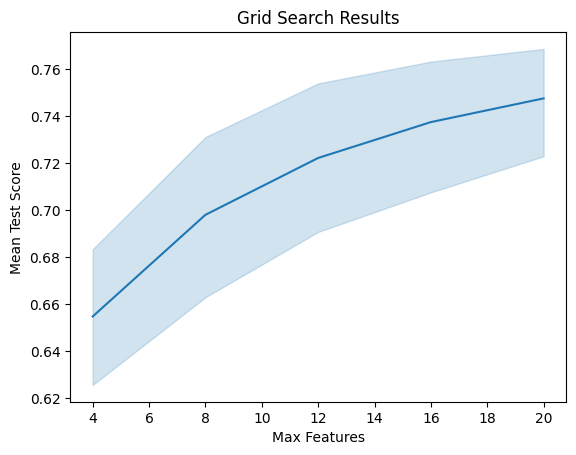

In [76]:
sns.lineplot(x='param_randomforestclassifier__max_features', y='mean_test_score', data=grid.cv_results_)
plt.xlabel('Max Features')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.show()

In [77]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_randomforestclassifier__max_depth',
                     columns='param_randomforestclassifier__max_features')
pd.set_option("display.precision",4)
res = res.set_index(res.index.values.round(4))

<Axes: xlabel='param_randomforestclassifier__max_features'>

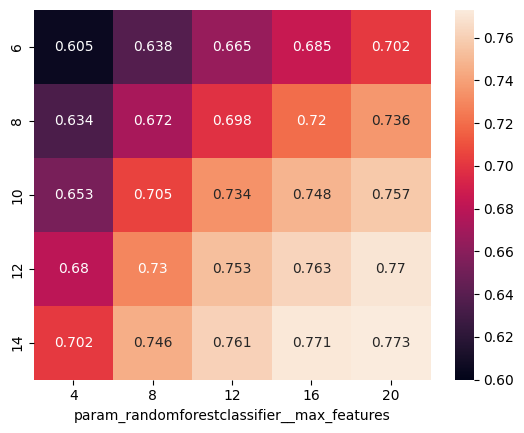

In [78]:
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

In [81]:
best_model = grid.best_estimator_
rf_classifier = best_model.named_steps['randomforestclassifier']
feature_importances = rf_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 12 artists>

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Top 10% Feature Importances')

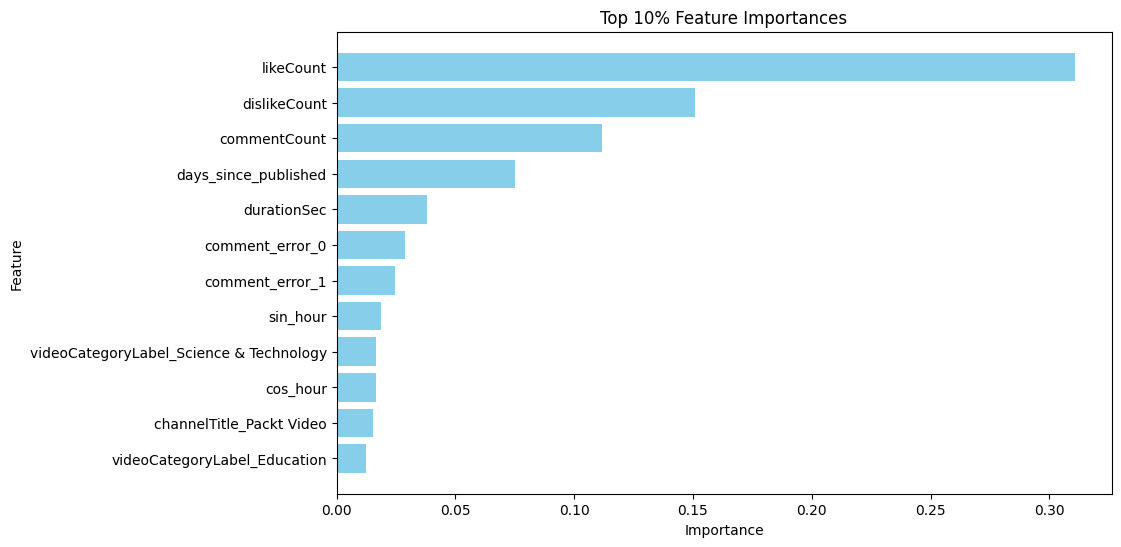

In [82]:
num_features_to_keep = int(0.1 * len(importance_df))
top_features = importance_df.iloc[:num_features_to_keep]

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10% Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Boosting

In [39]:
from sklearn.preprocessing import StandardScaler
pipe_cat = make_pipeline(SimpleImputer(strategy='constant'),
                         OneHotEncoder(handle_unknown="ignore"))
pipe_num = make_pipeline(StandardScaler(),SimpleImputer())
preprocessor = make_column_transformer( (pipe_cat,col_cat) , (pipe_num,col_num) )

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
pipe = make_pipeline(preprocessor, GradientBoostingClassifier())

In [41]:
from sklearn.model_selection import GridSearchCV
np.set_printoptions(precision=6, suppress=True)
param_grid = {'gradientboostingclassifier__learning_rate': np.logspace(-2, 0, 3),
              'gradientboostingclassifier__n_estimators': [10, 100, 1000]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, return_train_score=True)

In [42]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['channelTitle',
                                                                          'videoCategoryLabel',
                                                                          'definition',
                                                                          'caption',
                                                                          'licensedContent',
                                                                          'comment_error',
                                                                          'like_dislike_err...
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         ['durationSec',
                                                                          'likeCount',
                                                                          'dislikeCount',
                                                                          'commentCount',
                                                                          'days_since_published',
                                                                          'sin_hour',
                                                                          'cos_hour'])])),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             param_grid={'gradientboostingclassifier__learning_rate': array([0.01, 0.1 , 1.  ]),
                         'gradientboostingclassifier__n_estimators': [10, 100,
                                                                      1000]},
             return_train_score=True)

In [43]:
results = pd.DataFrame(grid.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.669478      0.291031         0.103939        0.085590   
1      33.841606      0.611116         0.104345        0.002927   
2     317.930710      1.408469         1.659622        0.151629   
3       3.489705      0.337940         0.054127        0.010878   
4      31.973388      0.672405         0.162411        0.021416   
5     306.247196      1.584183         1.905253        0.188733   
6       3.382943      0.274008         0.054058        0.009307   
7      29.607866      0.692631         0.112530        0.010492   
8     288.801832      1.907285         1.300375        0.077171   

  param_gradientboostingclassifier__learning_rate  \
0                                            0.01   
1                                            0.01   
2                                            0.01   
3                                             0.1   
4                                             0.1   
5                                             0.1   
6                                             1.0   
7                                             1.0   
8                                             1.0   

  param_gradientboostingclassifier__n_estimators  \
0                                             10   
1                                            100   
2                                           1000   
3                                             10   
4                                            100   
5                                           1000   
6                                             10   
7                                            100   
8                                           1000   

                                              params  split0_test_score  \
0  {'gradientboostingclassifier__learning_rate': ...           0.572055   
1  {'gradientboostingclassifier__learning_rate': ...           0.700244   
2  {'gradientboostingclassifier__learning_rate': ...           0.769456   
3  {'gradientboostingclassifier__learning_rate': ...           0.696669   
4  {'gradientboostingclassifier__learning_rate': ...           0.769781   
5  {'gradientboostingclassifier__learning_rate': ...           0.783428   
6  {'gradientboostingclassifier__learning_rate': ...           0.752721   
7  {'gradientboostingclassifier__learning_rate': ...           0.766044   
8  {'gradientboostingclassifier__learning_rate': ...           0.770593   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.575467           0.564348  ...         0.568666        0.004379   
1           0.702518           0.710595  ...         0.701287        0.005294   
2           0.767669           0.770556  ...         0.766118        0.003950   
3           0.701219           0.708320  ...         0.699110        0.006144   
4           0.768643           0.769743  ...         0.767353        0.002834   
5           0.785215           0.785505  ...         0.782074        0.003426   
6           0.758895           0.752519  ...         0.753315        0.003040   
7           0.761495           0.772506  ...         0.763096        0.005851   
8           0.761820           0.755119  ...         0.760366        0.006197   

   rank_test_score  split0_train_score  split1_train_score  \
0                9            0.577568            0.577528   
1                7            0.708007            0.705001   
2                3            0.786002            0.785108   
3                8            0.706666            0.706707   
4                2            0.787058            0.786205   
5                1            0.880123            0.878580   
6                6            0.772637            0.773612   
7                4            0.824268            0.816834   
8                5            0.840639            0.819109   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.566496           

In [44]:
print(f"The best parameters on validation set is: {grid.best_params_}")
print("accuracy on training set: %f" % grid.score(X_train, y_train))
print("accuracy on test set: %f" % grid.score(X_test, y_test))

The best parameters on validation set is: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__n_estimators': 1000}
accuracy on training set: 0.867347
accuracy on test set: 0.780409


<Axes: xlabel='param_gradientboostingclassifier__learning_rate', ylabel='mean_test_score'>

Text(0.5, 0, 'Learning Rate')

Text(0, 0.5, 'Mean Test Score')

Text(0.5, 1.0, 'Grid Search Results')

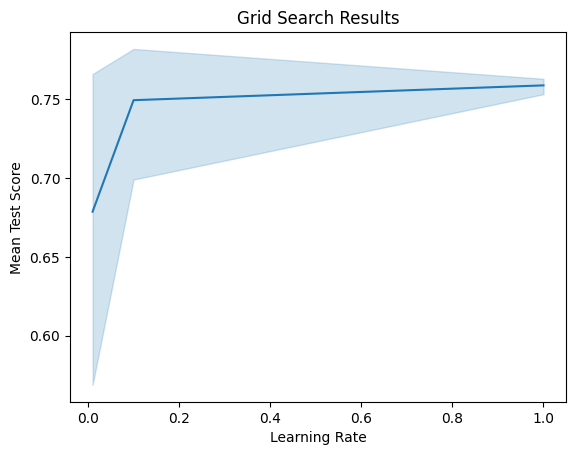

In [45]:
sns.lineplot(x='param_gradientboostingclassifier__learning_rate', y='mean_test_score', data=grid.cv_results_)
plt.xlabel('Learning Rate')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.show()

<Axes: xlabel='param_gradientboostingclassifier__n_estimators', ylabel='mean_test_score'>

Text(0.5, 0, 'Number of Estimators')

Text(0, 0.5, 'Mean Test Score')

Text(0.5, 1.0, 'Grid Search Results')

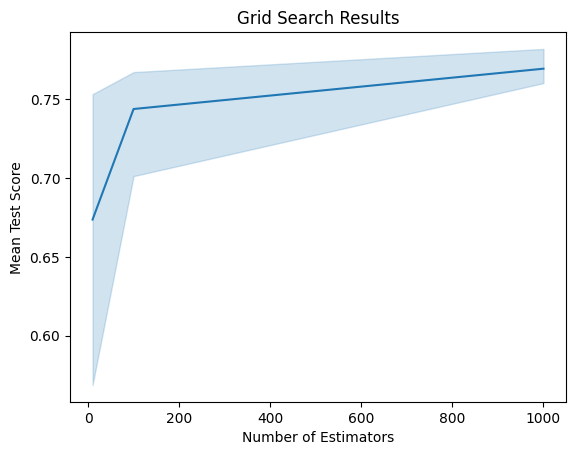

In [46]:
sns.lineplot(x='param_gradientboostingclassifier__n_estimators', y='mean_test_score', data=grid.cv_results_)
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.show()

In [47]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score',
                     index='param_gradientboostingclassifier__learning_rate',
                     columns='param_gradientboostingclassifier__n_estimators')
pd.set_option("display.precision",4)
res = res.set_index(res.index.values.round(4))

<Axes: xlabel='param_gradientboostingclassifier__n_estimators'>

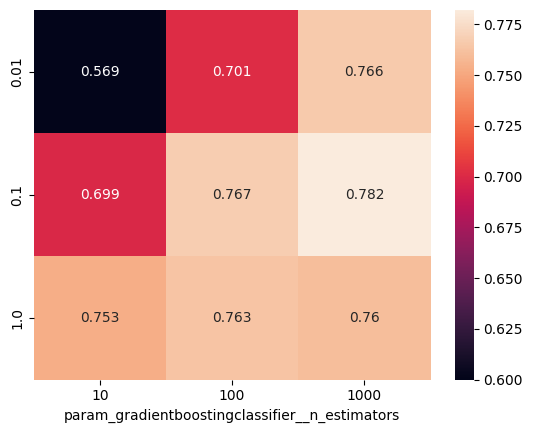

In [48]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
# Logistic Regression
X = m_data.drop("viewCategory", axis = 1)
y = m_data["viewCategory"]
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.1, random_state=0)

(34192, 17)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

pipe_cat = make_pipeline(SimpleImputer(strategy='constant'),
                         OneHotEncoder(handle_unknown="ignore"))
pipe_num = make_pipeline(StandardScaler(), SimpleImputer())
preprocessor = make_column_transformer( (pipe_cat,col_cat) , (pipe_num,col_num) )

In [ ]:
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(preprocessor,
                     LogisticRegression(solver='lbfgs', max_iter=100000, random_state = 0))

In [ ]:
from sklearn.model_selection import GridSearchCV

# tuning parameters
param_grid = {'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['channelTitle',
                                                                          'videoCategoryLabel',
                                                                          'definition',
                                                                          'caption',
                                                                          'licensedContent',
                                                                          'comment_error',
                                                                          'like_dislike_err...
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         ['durationSec',
                                                                          'likeCount',
                                                                          'dislikeCount',
                                                                          'commentCount',
                                                                          'days_since_published',
                                                                          'sin_hour',
                                                                          'cos_hour'])])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=100000,
                                                           random_state=0))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1.0, 10, 100]},
             return_train_score=True)

In [ ]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         1.3266        0.0220           0.0442          0.0011   
1         3.4541        0.0488           0.0483          0.0051   
2         9.5237        0.2803           0.0446          0.0016   
3        23.9969        1.2506           0.0345          0.0101   
4        43.7415        2.2128           0.0251          0.0009   

  param_logisticregression__C                           params  \
0                        0.01  {'logisticregression__C': 0.01}   
1                         0.1   {'logisticregression__C': 0.1}   
2                         1.0   {'logisticregression__C': 1.0}   
3                          10    {'logisticregression__C': 10}   
4                         100   {'logisticregression__C': 100}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0             0.5574             0.5664             0.5689             0.5721   
1             0.5977             0.6026             0.6051             0.6040   
2             0.6317             0.6354             0.6378             0.6376   
3             0.6682             0.6652             0.6705             0.6721   
4             0.6983             0.6991             0.6966             0.7030   

   ...  mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0  ...           0.5674          0.0054                5              0.5731   
1  ...           0.6042          0.0045                4              0.6082   
2  ...           0.6367          0.0031                3              0.6406   
3  ...           0.6699          0.0029                2              0.6742   
4  ...           0.7004          0.0031                1              0.7039   

   split1_train_score  split2_train_score  split3_train_score  \
0              0.5720              0.5757              0.5738   
1              0.6090              0.6109              0.6147   
2              0.6433              0.6453              0.6474   
3              0.6766              0.6760              0.6782   
4              0.7063              0.7071              0.7095   

   split4_train_score  mean_train_score  std_train_score  
0              0.5697            0.5729           0.0020  
1              0.6081            0.6102           0.0025  
2              0.6403            0.6434           0.0027  
3              0.6751            0.6760           0.0014  
4              0.7062            0.7066           0.0018  

[5 rows x 21 columns]

In [ ]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score',
                     index='param_logisticregression__C')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))
res

mean_test_score
0.01              0.567
0.10              0.604
1.00              0.637
10.00             0.670
100.00            0.700

In [ ]:
print("accuracy on training set: %f" % grid.score(X_train, y_train))
print("accuracy on test set: %f" % grid.score(X_test, y_test))

accuracy on training set: 0.709281
accuracy on test set: 0.702632


<Axes: >

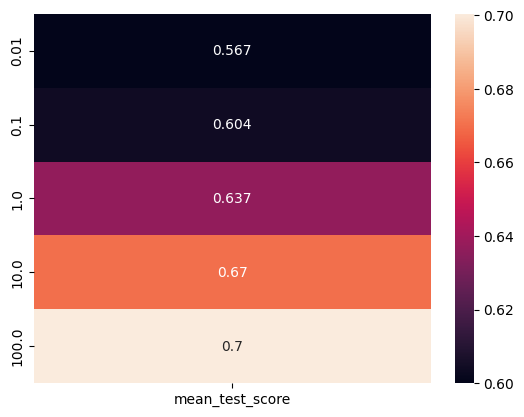

In [ ]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

## Kernel SVM

In [ ]:
pipe_cat_svm = make_pipeline(OneHotEncoder(handle_unknown="ignore"))
preprocessor_svm = make_column_transformer( (pipe_cat_svm,col_cat) )

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#pipe_num_svm = make_pipeline(StandardScaler())
#preprocessor_svm1 = make_column_transformer( (pipe_cat_svm,col_cat) , (pipe_num_svm,col_num) )
#pipe_svc = make_pipeline(preprocessor_svm, SVC())
pipe_svc = make_pipeline(preprocessor, SVC())

np.set_printoptions(precision=6, suppress=True)
param_grid_svm = {'svc__C': np.logspace(-3, 3, 7),
                  'svc__gamma': np.logspace(-3, 3, 7) / X_train.shape[0]}
param_grid_svm


{'svc__C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ,
        1000.   ]),
 'svc__gamma': array([0.      , 0.      , 0.000003, 0.000032, 0.000325, 0.00325 ,
        0.032497])}

In [ ]:
grid_svm = GridSearchCV(pipe_svc, param_grid=param_grid_svm, cv=5, return_train_score=True)

grid_svm.fit(X_train, y_train)
result_svm = pd.DataFrame(grid_svm.cv_results_)
result_svm

In [ ]:
grid_svm.best_params_

In [ ]:
accuracy = grid_svm.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

In [ ]:
print("accuracy on training set: %f" % grid_svm.score(X_train, y_train))
print("accuracy on test set: %f" % grid_svm.score(X_test, y_test))

In [ ]:
res_svm = pd.pivot_table(pd.DataFrame(grid_svm.cv_results_), values='mean_test_score', index='param_svc__C', columns='param_svc__gamma')
pd.set_option("display.precision",4)
res_svm = res_svm.set_index(res_svm.index.values.round(4))
res_svm

In [ ]:
import seaborn as sns
sns.heatmap(res_svm, annot=True, fmt=".3g", vmin=0.6)

## MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
pipe_mlp = make_pipeline(preprocessor, MLPClassifier(random_state = 0, max_iter = 1500))
param_grid_mlp = {'mlpclassifier__hidden_layer_sizes':
              [(10,), (50,), (100,), (10, 10), (50, 50)] }
grid_mlp = GridSearchCV(pipe_mlp, param_grid = param_grid_mlp, cv=5, return_train_score=True)
grid_mlp.fit(X_train, y_train)

In [ ]:
result_mlp = pd.DataFrame(grid_mlp.cv_results_)
result_mlp

In [ ]:
print('The best accracy is when ',grid_mlp.best_params_ )

In [ ]:
print("accuracy on training set: %f" % grid_mlp.score(X_train, y_train))
print("accuracy on test set: %f" % grid_mlp.score(X_test, y_test))

## NLP RNN MODEL

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model

In [ ]:

nlp_data = data.loc[loaded_index_data["index"]]
X = nlp_data["videoTitle"]+nlp_data["videoDescription"]
y = nlp_data.viewCategory
X
y

7        Power Query & DAX Formulas for Advanced Data M...
16       Double OR Logical Tests in SUMIFS Function usi...
18       Combine Two Excel Files Into PivotTable Report...
38       Create a Dynamic Lookup Table using INDEX & LO...
43       OR Logical Test Average Excel Formula. DAVERAG...
                               ...                        
44256    KDD2016 paper 1202Title: Sampling of Attribute...
44257    KDD2016 paper 1227Title: Identifying Earmarks ...
44258    KDD2016 paper 1236Title: Online Feature Select...
44259    KDD2016 paper 958Title: Scalable Betweenness C...
44260    KDD2016 paper 799Title: Identifying Earmarks i...
Length: 34192, dtype: object

7        3
16       3
18       3
38       3
43       2
        ..
44256    1
44257    0
44258    1
44259    2
44260    0
Name: viewCategory, Length: 34192, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [ ]:
y_categorical = keras.utils.to_categorical(y, num_classes=5)
y_categorical[0]

array([0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
X = X.astype(str)  # Convert to string if X is of float type

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y_categorical, test_size=0.1, random_state=0)

## Preprocessing: **Tokenization**

In [ ]:
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer

# Download NLTK stopwords (if not already downloaded)
import nltk
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Tokenizer configuration
num_words = 10000
tokenizer = Tokenizer(num_words=num_words, lower=True, split=" ")

# Remove stopwords
X_train_no_stopwords = [' '.join([word for word in text.split() if word.lower() not in stop_words]) for text in X_train]

# Fit tokenizer on preprocessed text
tokenizer.fit_on_texts(X_train_no_stopwords)

# Get vocabulary size
vocab_size = len(tokenizer.word_index)
print(vocab_size)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

77949


In [ ]:
print(tokenizer.word_index)

{'https': 1, 'com': 2, 'www': 3, 'data': 4, 'http': 5, 'video': 6, 'facebook': 7, 'twitter': 8, 'course': 9, 'us': 10, 'learn': 11, 'excel': 12, 'youtube': 13, 'learning': 14, 'training': 15, 'tutorial': 16, 'python': 17, 'bit': 18, 'ly': 19, '1': 20, 'watch': 21, 'packtvideo': 22, 'follow': 23, '2': 24, 'utm': 25, 'using': 26, 'science': 27, 'channel': 28, '3': 29, 'v': 30, 'intellipaat': 31, 'get': 32, 'find': 33, 'edureka': 34, 'machine': 35, 'visit': 36, 'packtpub': 37, 'use': 38, 'linkedin': 39, 'certification': 40, 'code': 41, '•': 42, 'tutorials': 43, 'simplilearn': 44, 'create': 45, 'please': 46, 'one': 47, '5': 48, 'project': 49, 'marketing': 50, 'online': 51, 'videos': 52, '4': 53, 'devops': 54, 'gl': 55, 'goo': 56, 'like': 57, 'programming': 58, 'subscribe': 59, 'big': 60, 'development': 61, 'aws': 62, 'web': 63, 'full': 64, 'analytics': 65, 'java': 66, 'playlist': 67, 'comthis': 68, 'in': 69, 'free': 70, 'help': 71, 'source': 72, 'beginners': 73, 'instagram': 74, 'on': 75, 

In [ ]:
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

print(X_train.iloc[0])
print(X_train_tokens[0])

MrExcel's Learn Excel #648 - Changing Numbers GraphicallySteve asks if he can build an Excel worksheet where people can change numbers by dragging a graphical element. Episode 648 shows you how you can use a chart in previous versions of Excel to solve this problem. This blog is the video podcast companion to the book, Learn Excel from MrExcel. Download a new two minute video every workday to learn one of the 277 tips from the book!
[1136, 11, 12, 1326, 614, 2231, 1569, 6654, 3886, 150, 3490, 12, 874, 5331, 190, 3886, 431, 614, 619, 6712, 328, 2957, 2162, 351, 499, 249, 686, 249, 3886, 38, 328, 147, 69, 960, 2151, 1044, 12, 76, 834, 541, 389, 541, 107, 650, 582, 6, 240, 718, 76, 582, 210, 11, 12, 1052, 322, 130, 328, 85, 191, 548, 6, 232, 748, 76, 11, 47, 1044, 582, 2131, 152, 1052, 582, 210]


In [ ]:
word_to_id = tokenizer.word_index
id_to_word = {value:key for key,value in word_to_id.items()}

## Preprocessing: **Padding**

In [ ]:
num_tokens = [len(tokens) for tokens in X_train_tokens]
num_tokens = np.array(num_tokens)

print(np.mean(num_tokens))
print(np.max(num_tokens))

175.07487326140648
3909


In [ ]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens) # max sequence length is set to the average plus 2 standard deviations.
max_tokens = int(max_tokens)
max_tokens

520

In [ ]:
np.sum(num_tokens < max_tokens) / len(num_tokens) # This covers about 92% of the data-set.

0.9280839724424802

In [ ]:
from keras.preprocessing.sequence import pad_sequences
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_tokens, padding='pre', truncating='pre')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_tokens, padding='pre', truncating='pre')
print(X_train_pad.shape)
print(X_test_pad.shape)

(30772, 520)
(3420, 520)


In [ ]:
np.array(X_train_tokens[0])

array([1136,   11,   12, 1326,  614, 2231, 1569, 6654, 3886,  150, 3490,
         12,  874, 5331,  190, 3886,  431,  614,  619, 6712,  328, 2957,
       2162,  351,  499,  249,  686,  249, 3886,   38,  328,  147,   69,
        960, 2151, 1044,   12,   76,  834,  541,  389,  541,  107,  650,
        582,    6,  240,  718,   76,  582,  210,   11,   12, 1052,  322,
        130,  328,   85,  191,  548,    6,  232,  748,   76,   11,   47,
       1044,  582, 2131,  152, 1052,  582,  210])

In [ ]:
X_train_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

## Model: **Recurrent Neural Network**

In [ ]:
emd_dim = 512

In [ ]:
from keras.backend import dropout
from keras.models import Sequential
from keras.layers import Dense, GRU, LSTM,Embedding, Dropout,BatchNormalization, Bidirectional

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=num_words, output_dim=emd_dim, input_length=max_tokens, name='embedding'))
model_lstm.add(LSTM(units=128, return_sequences=True, name='LSTM_1', dropout=0.5))
model_lstm.add(LSTM(units=64, return_sequences=True, name='LSTM_2', dropout=0.5))
model_lstm.add(LSTM(units=32, return_sequences=False, name='LSTM_3', dropout=0.5))
model_lstm.add(Dense(32, activation='relu', name='FC1'))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(16, activation='relu', name='FC2'))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(5, activation='softmax', name='output'))

model_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 520, 512)          5120000   
                                                                 
 LSTM_1 (LSTM)               (None, 520, 128)          328192    
                                                                 
 LSTM_2 (LSTM)               (None, 520, 64)           49408     
                                                                 
 LSTM_3 (LSTM)               (None, 32)                12416     
                                                                 
 FC1 (Dense)                 (None, 32)                1056      
                                                                 
 batch_normalization_9 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                      

In [ ]:
learning_rate=1e-3
batch_size=256
epochs=20

optimizer = keras.optimizers.Adam(learning_rate=learning_rate,weight_decay=1e-5)
model_lstm.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
train_model_lstm = model_lstm.fit(X_train_pad, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size)

Epoch 1/20
109/109 [==============================] - 25s 160ms/step - loss: 1.7004 - accuracy: 0.3329 - val_loss: 1.5050 - val_accuracy: 0.3613
Epoch 2/20
109/109 [==============================] - 14s 132ms/step - loss: 1.3598 - accuracy: 0.4105 - val_loss: 1.3468 - val_accuracy: 0.4181
Epoch 3/20
109/109 [==============================] - 13s 122ms/step - loss: 1.2306 - accuracy: 0.4567 - val_loss: 1.1809 - val_accuracy: 0.4688
Epoch 4/20
109/109 [==============================] - 11s 102ms/step - loss: 1.1634 - accuracy: 0.4909 - val_loss: 1.1202 - val_accuracy: 0.5010
Epoch 5/20
109/109 [==============================] - 12s 109ms/step - loss: 1.1013 - accuracy: 0.5204 - val_loss: 1.0998 - val_accuracy: 0.5052
Epoch 6/20
109/109 [==============================] - 11s 100ms/step - loss: 1.0615 - accuracy: 0.5424 - val_loss: 1.1152 - val_accuracy: 0.5075
Epoch 7/20
109/109 [==============================] - 10s 96ms/step - loss: 1.0210 - accuracy: 0.5637 - val_loss: 1.1102 - val_acc

<Axes: >

<Axes: >

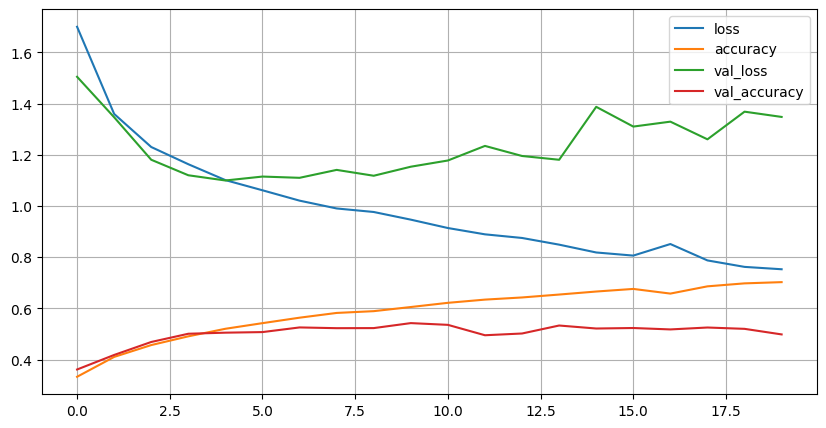

In [ ]:
pd.DataFrame(train_model_lstm.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca()
plt.show()

In [ ]:
model_lstm.evaluate(X_test_pad, y_test)

107/107 [==============================] - 2s 21ms/step - loss: 1.2698 - accuracy: 0.5184


[1.2697726488113403, 0.5184210538864136]

In [ ]:
# Save the model
model_lstm.save('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


107/107 [==============================] - 18s 158ms/step


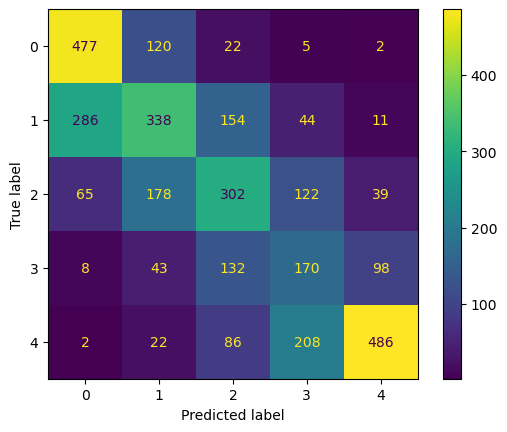

In [ ]:
# Load the model
model_lstm = load_model("model\lstm_model.h5")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_labels = np.argmax(y_test, axis=1) + 1
y_pred_class = np.argmax(model_lstm.predict(X_test_pad), axis=1) + 1
cnf_matrix = confusion_matrix(y_pred_class, test_labels)
fig = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix)
fig.plot()

In [ ]:
from keras.backend import dropout
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding, Dropout,BatchNormalization, Bidirectional

model_GRU = Sequential()
model_GRU.add(Embedding(input_dim=num_words, output_dim=emd_dim, input_length=max_tokens, name='embedding'))
model_GRU.add(GRU(units=128, return_sequences=True, name='gru_1', dropout=0.5))
model_GRU.add(GRU(units=64, return_sequences=True, name='gru_2', dropout=0.5))
model_GRU.add(GRU(units=32, return_sequences=False, name='gru_3', dropout=0.5))
model_GRU.add(Dense(32, activation='relu', name='FC1'))
model_GRU.add(BatchNormalization())
model_GRU.add(Dropout(0.5))
model_GRU.add(Dense(16, activation='relu', name='FC2'))
model_GRU.add(BatchNormalization())
model_GRU.add(Dropout(0.5))
model_GRU.add(Dense(5, activation='softmax', name='output'))

model_GRU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 520, 512)          5120000   
                                                                 
 gru_1 (GRU)                 (None, 520, 128)          246528    
                                                                 
 gru_2 (GRU)                 (None, 520, 64)           37248     
                                                                 
 gru_3 (GRU)                 (None, 32)                9408      
                                                                 
 FC1 (Dense)                 (None, 32)                1056      
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                        

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=learning_rate,weight_decay=1e-5)
model_GRU.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='accuracy')


In [ ]:
train_model_GRU = model_GRU.fit(X_train_pad, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size)

Epoch 1/20
109/109 [==============================] - 23s 155ms/step - loss: 1.6846 - accuracy: 0.3271 - val_loss: 1.4571 - val_accuracy: 0.3801
Epoch 2/20
109/109 [==============================] - 13s 123ms/step - loss: 1.3604 - accuracy: 0.4075 - val_loss: 1.2355 - val_accuracy: 0.4594
Epoch 3/20
109/109 [==============================] - 13s 117ms/step - loss: 1.2450 - accuracy: 0.4506 - val_loss: 1.1632 - val_accuracy: 0.4825
Epoch 4/20
109/109 [==============================] - 12s 113ms/step - loss: 1.1766 - accuracy: 0.4823 - val_loss: 1.1900 - val_accuracy: 0.4782
Epoch 5/20
109/109 [==============================] - 12s 109ms/step - loss: 1.1255 - accuracy: 0.5124 - val_loss: 1.1061 - val_accuracy: 0.5084
Epoch 6/20
109/109 [==============================] - 11s 98ms/step - loss: 1.0847 - accuracy: 0.5325 - val_loss: 1.0905 - val_accuracy: 0.5205
Epoch 7/20
109/109 [==============================] - 10s 95ms/step - loss: 1.0537 - accuracy: 0.5540 - val_loss: 1.0919 - val_accu

In [ ]:
model_GRU.evaluate(X_test_pad, y_test)

107/107 [==============================] - 2s 20ms/step - loss: 1.3337 - accuracy: 0.5415


[1.3337229490280151, 0.5415204763412476]

<Axes: >

<Axes: >

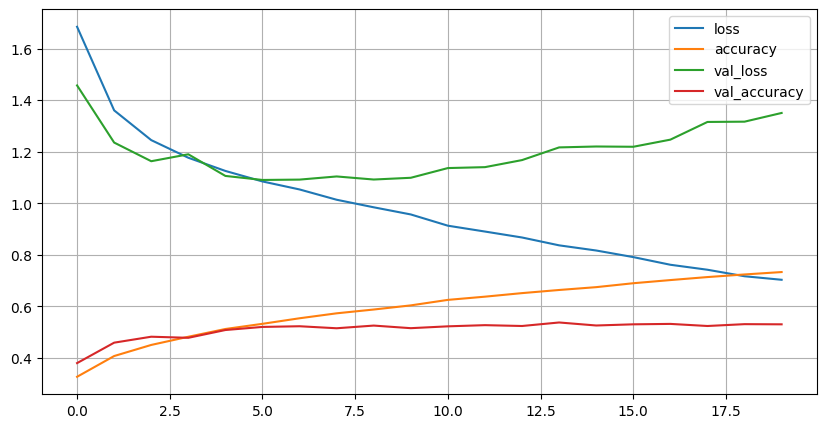

In [ ]:
pd.DataFrame(train_model_GRU.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca()
plt.show()

In [ ]:
# Save the model
model_GRU.save('gru_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model
#model_GRU = load_model("model\gru_model.h5")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_labels = np.argmax(y_test, axis=1) + 1
y_pred_class = np.argmax(model_GRU.predict(X_test_pad), axis=1) + 1
cnf_matrix = confusion_matrix(y_pred_class, test_labels)
fig = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix)
fig.plot()

In [ ]:
# Load the model
#loaded_model = load_model("gru_model1.h5")

In [ ]:
model_bi = Sequential()
model_bi.add(Embedding(input_dim=num_words, output_dim=emd_dim, input_length=max_tokens, name='embedding'))
model_bi.add(Bidirectional(GRU(units=128, return_sequences=True, name='gru_1', dropout=0.5)))
model_bi.add(Bidirectional(GRU(units=64, return_sequences=True, name='gru_2', dropout=0.5)))
model_bi.add(Bidirectional(GRU(units=32, return_sequences=False, name='gru_3', dropout=0.5)))
model_bi.add(Dense(64, activation='relu', name='FC1'))
model_bi.add(BatchNormalization())
model_bi.add(Dropout(0.5))
model_bi.add(Dense(32, activation='relu', name='FC2'))
model_bi.add(BatchNormalization())
model_bi.add(Dropout(0.5))
model_bi.add(Dense(16, activation='relu', name='FC3'))
model_bi.add(BatchNormalization())
model_bi.add(Dropout(0.5))
model_bi.add(Dense(5, activation='softmax', name='output'))

model_bi.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 520, 512)          5120000   
                                                                 
 bidirectional_20 (Bidirect  (None, 520, 256)          493056    
 ional)                                                          
                                                                 
 bidirectional_21 (Bidirect  (None, 520, 128)          123648    
 ional)                                                          
                                                                 
 bidirectional_22 (Bidirect  (None, 64)                31104     
 ional)                                                          
                                                                 
 FC1 (Dense)                 (None, 64)                4160      
                                                     

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=learning_rate,weight_decay=1e-5)
model_bi.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
train_model_bi = model_bi.fit(X_train_pad, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size)

Epoch 1/20
109/109 [==============================] - 37s 234ms/step - loss: 1.9713 - accuracy: 0.2679 - val_loss: 1.4165 - val_accuracy: 0.3622
Epoch 2/20
109/109 [==============================] - 22s 204ms/step - loss: 1.5206 - accuracy: 0.3630 - val_loss: 1.2483 - val_accuracy: 0.4288
Epoch 3/20
109/109 [==============================] - 21s 196ms/step - loss: 1.3381 - accuracy: 0.4170 - val_loss: 1.1744 - val_accuracy: 0.4812
Epoch 4/20
109/109 [==============================] - 21s 190ms/step - loss: 1.2427 - accuracy: 0.4567 - val_loss: 1.1559 - val_accuracy: 0.4828
Epoch 5/20
109/109 [==============================] - 19s 174ms/step - loss: 1.1769 - accuracy: 0.4820 - val_loss: 1.1122 - val_accuracy: 0.5029
Epoch 6/20
109/109 [==============================] - 18s 166ms/step - loss: 1.1240 - accuracy: 0.5122 - val_loss: 1.1194 - val_accuracy: 0.5006
Epoch 7/20
109/109 [==============================] - 18s 168ms/step - loss: 1.0868 - accuracy: 0.5298 - val_loss: 1.1177 - val_ac

In [ ]:
model_bi.evaluate(X_test_pad, y_test)

107/107 [==============================] - 4s 40ms/step - loss: 1.2241 - accuracy: 0.5509


[1.2241483926773071, 0.5508772134780884]

<Axes: >

<Axes: >

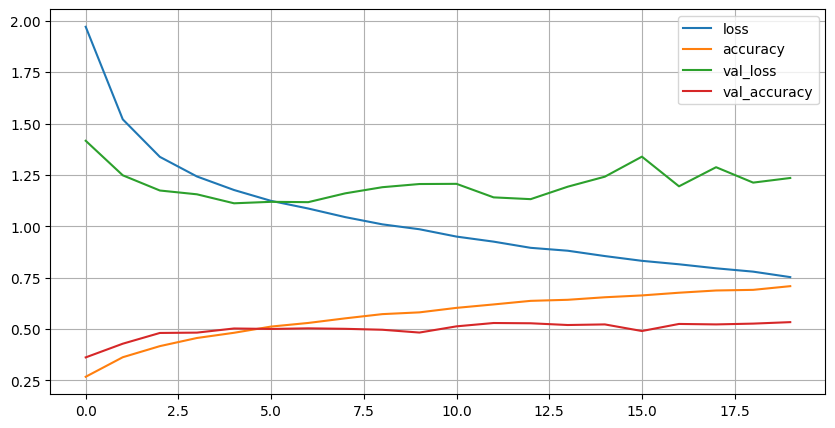

In [ ]:
pd.DataFrame(train_model_bi.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca()
plt.show()

In [ ]:
# Save the model
model_bi.save('gru_model_bi.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


107/107 [==============================] - 26s 228ms/step


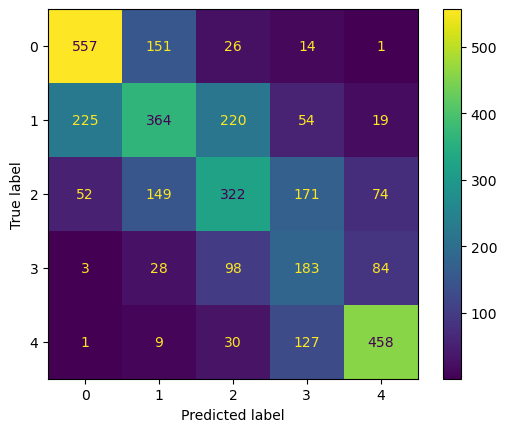

In [ ]:
# Load the model
model_bi = load_model("model\gru_model_bi.h5")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_labels = np.argmax(y_test, axis=1) + 1
y_pred_class = np.argmax(model_bi.predict(X_test_pad), axis=1) + 1
cnf_matrix = confusion_matrix(y_pred_class, test_labels)
fig = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix)
fig.plot()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import MultiHeadAttention

class TFAttentionModel(tf.keras.Model):
    def __init__(self, d_model, n_head):
        super().__init__()
        self.attn = layers.MultiHeadAttention(num_heads=n_head, key_dim=d_model)
    def call(self, x):
        return self.attn(x, x)

In [ ]:
# Original Bidirectional GRU layers
model_bi_att = Sequential()
model_bi_att.add(Embedding(input_dim=num_words, output_dim=emd_dim, input_length=max_tokens, name='embedding'))
model_bi_att.add(Bidirectional(GRU(units=128, return_sequences=True, name='gru_1', dropout=0.5)))

# Multi-Head Attention layer with specified num_heads and key_dim
model_bi_att.add(TFAttentionModel(d_model=128, n_head=8))

model_bi_att.add(Bidirectional(GRU(units=64, return_sequences=True, name='gru_2', dropout=0.5)))
model_bi_att.add(Bidirectional(GRU(units=32, return_sequences=False, name='gru_3', dropout=0.5)))

# Additional Dense and Dropout layers
model_bi_att.add(Dense(64, activation='relu', name='FC1'))
model_bi_att.add(BatchNormalization())
model_bi_att.add(Dropout(0.5))
model_bi_att.add(Dense(32, activation='relu', name='FC2'))
model_bi_att.add(BatchNormalization())
model_bi_att.add(Dropout(0.5))
model_bi_att.add(Dense(16, activation='relu', name='FC3'))
model_bi_att.add(BatchNormalization())
model_bi_att.add(Dropout(0.5))

# Output layer
model_bi_att.add(Dense(5, activation='softmax', name='output'))

# Model summary
model_bi_att.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 520, 512)          5120000   
                                                                 
 bidirectional_3 (Bidirecti  (None, 520, 256)          493056    
 onal)                                                           
                                                                 
 tf_attention_model_1 (TFAt  (None, 520, 256)          1051904   
 tentionModel)                                                   
                                                                 
 bidirectional_4 (Bidirecti  (None, 520, 128)          123648    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                31104     
 onal)                                                

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=learning_rate,weight_decay=1e-5)
model_bi_att.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
train_model_bi_att = model_bi_att.fit(X_train_pad, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size)

Epoch 1/20
109/109 [==============================] - 49s 342ms/step - loss: 1.9779 - accuracy: 0.2495 - val_loss: 1.4084 - val_accuracy: 0.3918
Epoch 2/20
109/109 [==============================] - 34s 308ms/step - loss: 1.4468 - accuracy: 0.3770 - val_loss: 1.1798 - val_accuracy: 0.4672
Epoch 3/20
109/109 [==============================] - 32s 293ms/step - loss: 1.2731 - accuracy: 0.4450 - val_loss: 1.1608 - val_accuracy: 0.4708
Epoch 4/20
109/109 [==============================] - 31s 288ms/step - loss: 1.1676 - accuracy: 0.4908 - val_loss: 1.0904 - val_accuracy: 0.5000
Epoch 5/20
109/109 [==============================] - 30s 279ms/step - loss: 1.1102 - accuracy: 0.5205 - val_loss: 1.1244 - val_accuracy: 0.4760
Epoch 6/20
109/109 [==============================] - 30s 279ms/step - loss: 1.0563 - accuracy: 0.5486 - val_loss: 1.0678 - val_accuracy: 0.5175
Epoch 7/20
109/109 [==============================] - 29s 269ms/step - loss: 1.0118 - accuracy: 0.5720 - val_loss: 1.0738 - val_ac

In [ ]:
model_bi_att.evaluate(X_test_pad, y_test)

107/107 [==============================] - 4s 40ms/step - loss: 1.5346 - accuracy: 0.5269


[1.5345747470855713, 0.526900589466095]

<Axes: >

<Axes: >

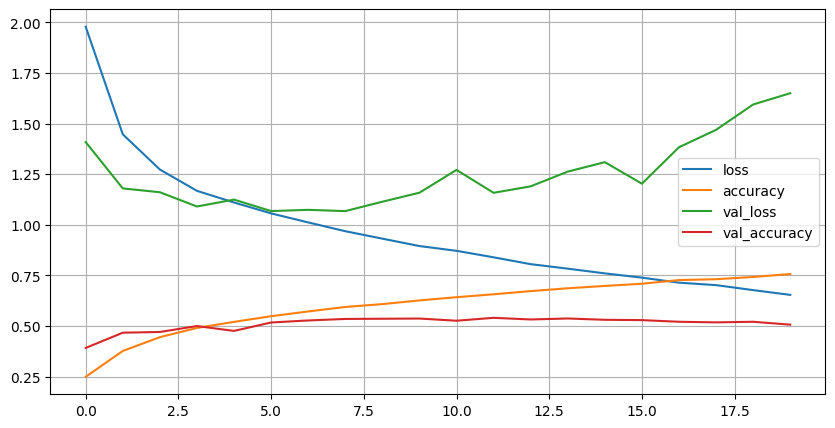

In [ ]:
pd.DataFrame(train_model_bi_att.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca()
plt.show()

In [ ]:
# Save the model
model_bi_att.save('gru_model_bi_att.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


107/107 [==============================] - 6s 39ms/step


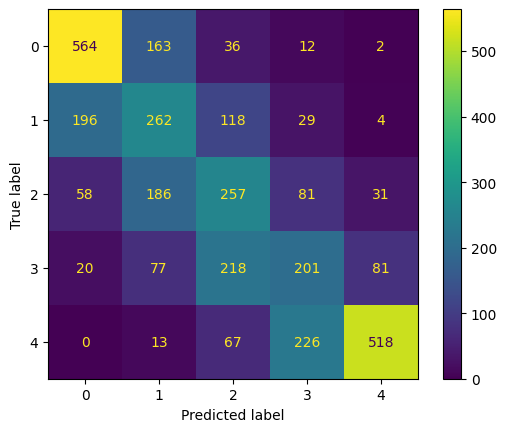

In [ ]:
# Load the model
#model_bi_att = load_model("model\gru_model_bi_att.h5")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_labels = np.argmax(y_test, axis=1) + 1
y_pred_class = np.argmax(model_bi_att.predict(X_test_pad), axis=1) + 1
cnf_matrix = confusion_matrix(y_pred_class, test_labels)
fig = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix)
fig.plot()

# Image Data CNN Model

In [ ]:
from zipfile import BadZipFile
# Load the .npz file
file_path = '/content/drive/MyDrive/Colab Notebooks/resized_images.npz'

# Create an empty DataFrame to store the loaded data
loaded_image_data = pd.DataFrame(columns=['index', 'image'])

try:
    # Try loading the .npz file
    with np.load(file_path) as loaded_data:
        for key in loaded_data.files:
            try:
                # Extract the index from the array name
                index = int(key.split('_')[1])

                # Extract the NumPy array from the loaded data
                img_array = loaded_data[key]

                # Append data to the new DataFrame
                loaded_image_data = pd.concat([loaded_image_data, pd.DataFrame({'index': [index], 'image': [img_array]})], ignore_index=True)

            except BadZipFile as e:
                # Handle the specific CRC-32 error for the problematic file
                print(f"Skipping file '{key}': {e}")

except BadZipFile as e:
    # Handle the general BadZipFile exception for the entire archive
    print(f"Error loading the .npz file: {e}")

Skipping file 'img_4813': Bad CRC-32 for file 'img_4813.npy'
Skipping file 'img_4814': Bad magic number for file header
Skipping file 'img_4815': Bad magic number for file header
Skipping file 'img_4816': Bad magic number for file header
Skipping file 'img_4817': Bad magic number for file header
Skipping file 'img_4818': Bad magic number for file header
Skipping file 'img_4819': Bad magic number for file header
Skipping file 'img_4820': Bad magic number for file header
Skipping file 'img_4821': Bad magic number for file header
Skipping file 'img_4822': Bad magic number for file header
Skipping file 'img_4823': Bad magic number for file header
Skipping file 'img_4824': Bad magic number for file header
Skipping file 'img_4825': Bad magic number for file header
Skipping file 'img_4826': Bad magic number for file header
Skipping file 'img_4827': Bad magic number for file header
Skipping file 'img_4828': Bad magic number for file header
Skipping file 'img_4829': Bad magic number for file he

In [ ]:
loaded_image_data

index                                              image
0          7  [[[255, 252, 0], [255, 252, 0], [255, 252, 0],...
1         16  [[[253, 1, 0], [254, 0, 0], [254, 0, 0], [254,...
2         18  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
3         38  [[[254, 0, 0], [254, 0, 0], [254, 0, 0], [254,...
4         43  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
...      ...                                                ...
34187  44256  [[[246, 246, 246], [255, 255, 255], [255, 255,...
34188  44257  [[[17, 19, 19], [22, 24, 23], [28, 30, 27], [3...
34189  44258  [[[255, 255, 255], [255, 255, 255], [255, 255,...
34190  44259  [[[10, 14, 13], [13, 17, 16], [15, 19, 18], [1...
34191  44260  [[[255, 255, 255], [255, 255, 255], [255, 255,...

[34192 rows x 2 columns]

Text(0.5, 1.0, 'Index: 7')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 1.0, 'Index: 16')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 1.0, 'Index: 18')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 1.0, 'Index: 38')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 1.0, 'Index: 43')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 1.0, 'Index: 54')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 1.0, 'Index: 55')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 1.0, 'Index: 70')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 1.0, 'Index: 71')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 1.0, 'Index: 85')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 1.0, 'Index: 133')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 1.0, 'Index: 139')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 1.0, 'Index: 148')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 1.0, 'Index: 151')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 1.0, 'Index: 152')

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 1.0, 'Index: 153')

(-0.5, 127.5, 127.5, -0.5)

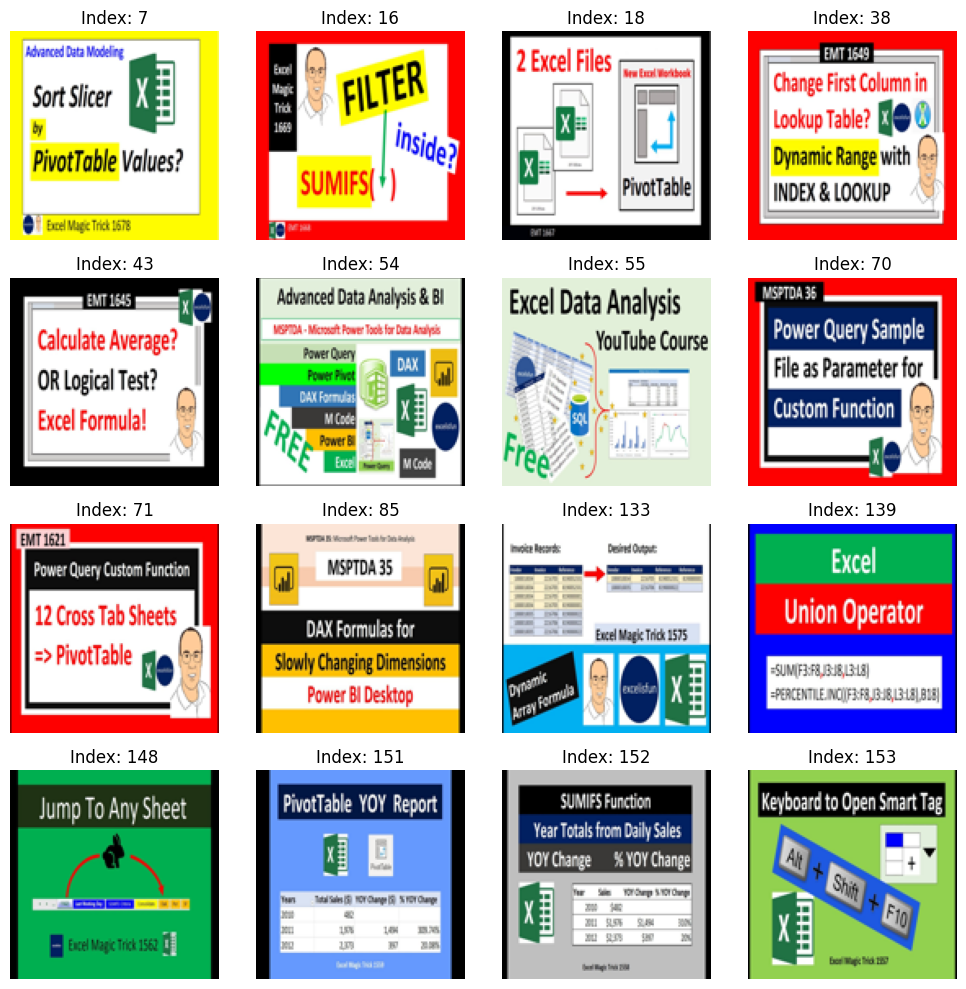

In [ ]:
# Assuming data is your DataFrame
# Replace "data" with the actual name of your DataFrame

# Load the DataFrame with image data (replace 'resized_image_data.pkl' with the actual filename)
#loaded_image_data = pd.read_pickle('resized_image_data.pkl')

# Create a dxd subplot grid
dim_of_axis = 4
fig, axes = plt.subplots(dim_of_axis, dim_of_axis, figsize=(10, 10))

# Iterate through the first 9 images and display in subplots
for i, (index, row) in enumerate(loaded_image_data.head(16).iterrows()):
    img_array = row['image']

    # Display the image in the subplot
    axes[i // dim_of_axis, i % dim_of_axis].imshow(img_array)
    axes[i // dim_of_axis, i % dim_of_axis].set_title(f"Index: {row['index']}")
    axes[i // dim_of_axis, i % dim_of_axis].axis('off')  # Turn off axis labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Data Prepare

In [ ]:
image_data = loaded_image_data.image

# Convert the list of lists into a NumPy array
image_array = np.array([np.array(img) for img in image_data])

# Reshape the array to the desired shape
image_array = image_array.reshape(34192, 128, 128, 3)

image_array.shape
m_data.viewCategory.shape

(34192, 128, 128, 3)

(34192,)

In [ ]:
X = image_array
y = m_data.viewCategory

Convert the target labels (y) into the one-hot format and show the value (y) for the first instance of the training dataset.

In [ ]:
y_categorical = keras.utils.to_categorical(y, num_classes=5)
y_categorical[0]

array([0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y_categorical, test_size=0.1, random_state=0)

In [ ]:
# normalize the x to [0,1]
X_train,X_test = X_train/255.0,X_test/255.0

## Model: **Convolusion Neural Network**

In [ ]:
from keras import models
from keras.models import Sequential
from keras.layers import InputLayer, MaxPooling2D, Conv2D, Dense, Flatten,BatchNormalization,Dropout, GlobalMaxPooling2D

model_cnn = Sequential()
model_cnn.add(InputLayer((128,128,3)))
model_cnn.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='same', activation='relu', name='layer_conv1'))
model_cnn.add(MaxPooling2D(pool_size=2, strides=2, name='pooling1'))
model_cnn.add(Conv2D(kernel_size=3, strides=1, filters=64, padding='same', activation='relu', name='layer_conv2'))
model_cnn.add(MaxPooling2D(pool_size=2, strides=2, name='pooling2'))

model_cnn.add(GlobalMaxPooling2D(name='GlobalPooling'))

model_cnn.add(Flatten(name='Flatten'))
model_cnn.add(Dense(256, activation='relu', name='fully-connected1'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(128, activation='relu', name='fully-connected2'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(5,activation='softmax', name='output'))

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_conv1 (Conv2D)        (None, 128, 128, 32)      896       
                                                                 
 pooling1 (MaxPooling2D)     (None, 64, 64, 32)        0         
                                                                 
 layer_conv2 (Conv2D)        (None, 64, 64, 64)        18496     
                                                                 
 pooling2 (MaxPooling2D)     (None, 32, 32, 64)        0         
                                                                 
 GlobalPooling (GlobalMaxPo  (None, 64)                0         
 oling2D)                                                        
                                                                 
 Flatten (Flatten)           (None, 64)                0         
                                                      

In [ ]:
learning_rate=1e-3
batch_size=256
epochs=30

optimizer = keras.optimizers.Adam(learning_rate=learning_rate,weight_decay=1e-5)
model_cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
train_model_cnn = model_cnn.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size)

Epoch 1/30
109/109 [==============================] - 11s 47ms/step - loss: 1.9255 - accuracy: 0.3108 - val_loss: 1.6003 - val_accuracy: 0.2840
Epoch 2/30
109/109 [==============================] - 3s 30ms/step - loss: 1.5640 - accuracy: 0.3560 - val_loss: 1.5236 - val_accuracy: 0.3674
Epoch 3/30
109/109 [==============================] - 3s 30ms/step - loss: 1.4314 - accuracy: 0.3885 - val_loss: 1.5117 - val_accuracy: 0.2953
Epoch 4/30
109/109 [==============================] - 3s 30ms/step - loss: 1.3477 - accuracy: 0.4180 - val_loss: 1.4467 - val_accuracy: 0.3700
Epoch 5/30
109/109 [==============================] - 3s 30ms/step - loss: 1.2928 - accuracy: 0.4403 - val_loss: 1.3643 - val_accuracy: 0.3993
Epoch 6/30
109/109 [==============================] - 3s 30ms/step - loss: 1.2584 - accuracy: 0.4527 - val_loss: 1.2785 - val_accuracy: 0.4389
Epoch 7/30
109/109 [==============================] - 3s 30ms/step - loss: 1.2341 - accuracy: 0.4596 - val_loss: 1.2943 - val_accuracy: 0.428

In [ ]:
model_cnn.evaluate(X_test, y_test)

107/107 [==============================] - 0s 4ms/step - loss: 1.2832 - accuracy: 0.4740


[1.283213496208191, 0.47397661209106445]

<Axes: >

<Axes: >

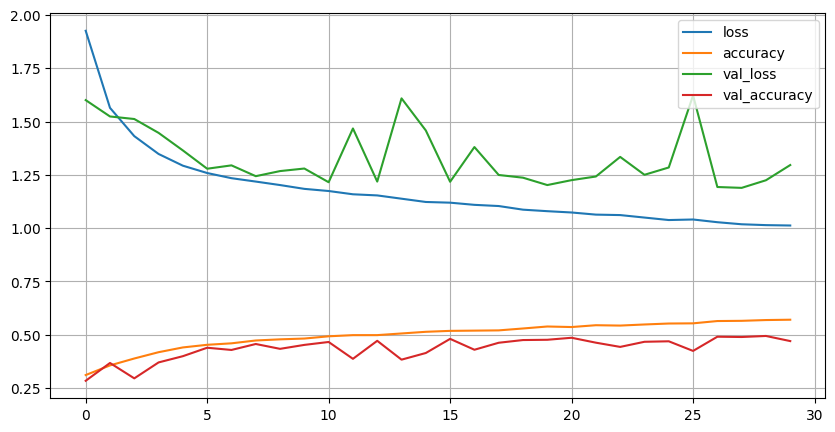

In [ ]:
pd.DataFrame(train_model_cnn.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca()
plt.show()

In [ ]:
# Save the model
model_cnn.save('cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


107/107 [==============================] - 1s 4ms/step


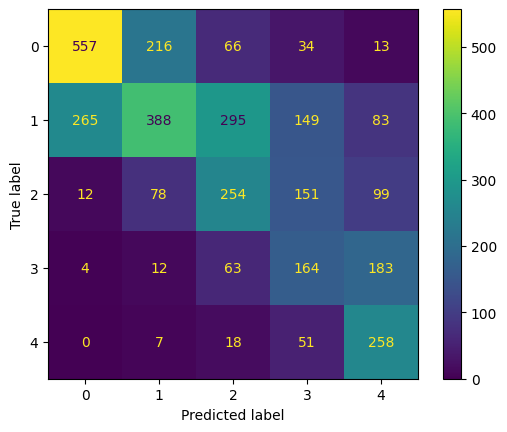

In [ ]:
# Load the model
#model_cnn = load_model("model\cnn_model.h5")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_labels = np.argmax(y_test, axis=1) + 1
y_pred_class = np.argmax(model_cnn.predict(X_test), axis=1) + 1
cnf_matrix = confusion_matrix(y_pred_class, test_labels)
fig = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix)
fig.plot()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y_categorical, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(
    X_train,y_train, test_size=0.1, random_state=0)

<Figure size 1000x1000 with 0 Axes>

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 0.98, 'Original Images')

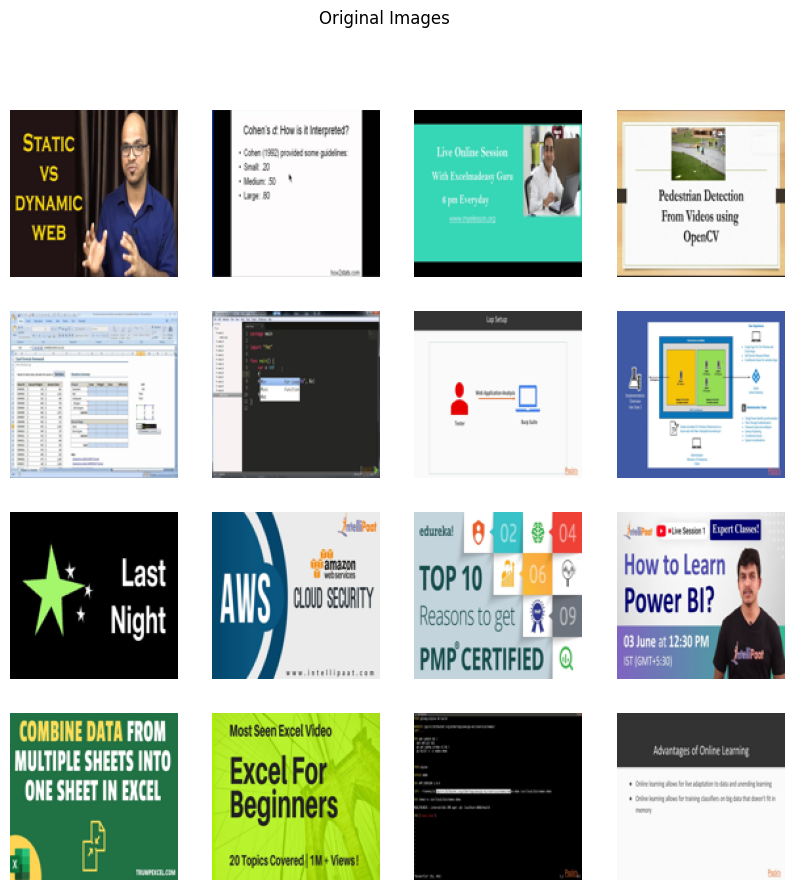

<Figure size 1000x1000 with 0 Axes>

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

<Axes: >

(-0.5, 127.5, 127.5, -0.5)

Text(0.5, 0.98, 'Augmented Images')

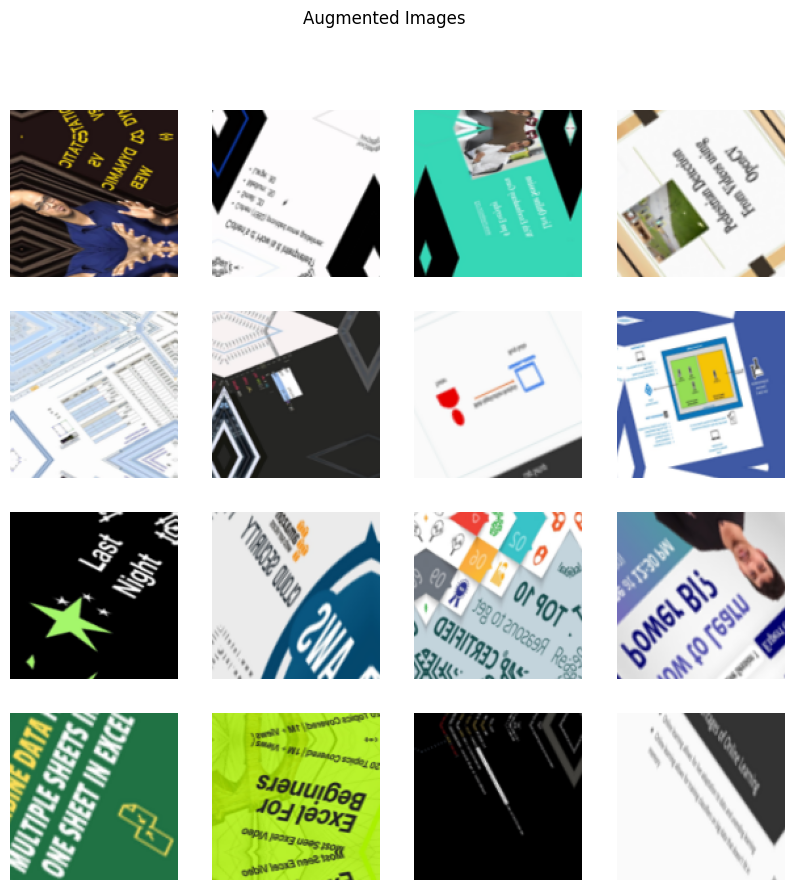

In [ ]:
import matplotlib.pyplot as plt

# Define the augmentation parameters
from keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = tf.keras.Sequential([
  RandomFlip('horizontal_and_vertical'),
  RandomRotation(0.2),
  RandomZoom(.5, .2), # lower and upper bound for zooming
])

# Plot original images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[:16][i])
    plt.axis("off")
plt.suptitle("Original Images")
plt.show()

# Plot augmented images
plt.figure(figsize=(10, 10))
for i in range(16):
    augmented_image = data_augmentation(X_train[:16][i][tf.newaxis, ...], training=True)
    plt.subplot(4, 4, i + 1)
    plt.imshow(augmented_image[0].numpy().astype("uint8"))
    plt.axis("off")
plt.suptitle("Augmented Images")
plt.show()

In [ ]:
import tensorflow as tf
# Define the batch size
batch_size = 256

X_train, X_val, X_test = X_train/255.0, X_val/255.0, X_test/255.0
# Create a custom data generator function
def data_generator(images, labels, batch_size, training=True):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    if training:
        # Apply data augmentation during training
        data_augmentation = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
            tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
            tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
        ])
        # Map the data augmentation function to the dataset
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), tf.cast(y, tf.float32)), num_parallel_calls=tf.data.AUTOTUNE)
    # Batch and prefetch the dataset
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Create training, validation, and test datasets
train_dataset = data_generator(X_train, y_train, batch_size, training=True)
val_dataset = data_generator(X_val, y_val, batch_size, training=False)
test_dataset = data_generator(X_test, y_test, batch_size, training=False)


In [ ]:
model_cnn_aug = Sequential()
model_cnn_aug.add(InputLayer((128,128,3)))
model_cnn_aug.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='same', activation='relu', name='layer_conv1'))
model_cnn_aug.add(MaxPooling2D(pool_size=2, strides=2, name='pooling1'))
model_cnn_aug.add(Conv2D(kernel_size=3, strides=1, filters=64, padding='same', activation='relu', name='layer_conv2'))
model_cnn_aug.add(MaxPooling2D(pool_size=2, strides=2, name='pooling2'))

model_cnn_aug.add(GlobalMaxPooling2D(name='GlobalPooling'))

model_cnn_aug.add(Flatten(name='Flatten'))
model_cnn_aug.add(Dense(256, activation='relu', name='fully-connected1'))
model_cnn_aug.add(BatchNormalization())
model_cnn_aug.add(Dropout(0.5))
model_cnn_aug.add(Dense(128, activation='relu', name='fully-connected2'))
model_cnn_aug.add(BatchNormalization())
model_cnn_aug.add(Dropout(0.5))
model_cnn_aug.add(Dense(5,activation='softmax', name='output'))

model_cnn_aug.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_conv1 (Conv2D)        (None, 128, 128, 32)      896       
                                                                 
 pooling1 (MaxPooling2D)     (None, 64, 64, 32)        0         
                                                                 
 layer_conv2 (Conv2D)        (None, 64, 64, 64)        18496     
                                                                 
 pooling2 (MaxPooling2D)     (None, 32, 32, 64)        0         
                                                                 
 GlobalPooling (GlobalMaxPo  (None, 64)                0         
 oling2D)                                                        
                                                                 
 Flatten (Flatten)           (None, 64)                0         
                                                      

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=learning_rate,weight_decay=1e-5)
model_cnn_aug.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
train_model_cnn_aug = model_cnn_aug.fit(train_dataset, epochs=epochs, validation_data=val_dataset)

Epoch 1/30
109/109 [==============================] - 16s 127ms/step - loss: 1.9485 - accuracy: 0.2781 - val_loss: 1.5827 - val_accuracy: 0.2976
Epoch 2/30
109/109 [==============================] - 13s 123ms/step - loss: 1.6376 - accuracy: 0.3196 - val_loss: 1.5643 - val_accuracy: 0.3246
Epoch 3/30
109/109 [==============================] - 13s 123ms/step - loss: 1.5250 - accuracy: 0.3436 - val_loss: 1.5125 - val_accuracy: 0.3681
Epoch 4/30
109/109 [==============================] - 13s 123ms/step - loss: 1.4582 - accuracy: 0.3576 - val_loss: 1.4621 - val_accuracy: 0.3252
Epoch 5/30
109/109 [==============================] - 13s 123ms/step - loss: 1.4198 - accuracy: 0.3772 - val_loss: 1.4122 - val_accuracy: 0.3824
Epoch 6/30
109/109 [==============================] - 13s 122ms/step - loss: 1.3907 - accuracy: 0.3882 - val_loss: 1.3910 - val_accuracy: 0.3938
Epoch 7/30
109/109 [==============================] - 13s 123ms/step - loss: 1.3745 - accuracy: 0.3979 - val_loss: 1.3629 - val_ac

In [ ]:
model_cnn_aug.evaluate(test_dataset)

14/14 [==============================] - 1s 45ms/step - loss: 1.3649 - accuracy: 0.4289


[1.3649401664733887, 0.4289473593235016]

<Axes: >

<Axes: >

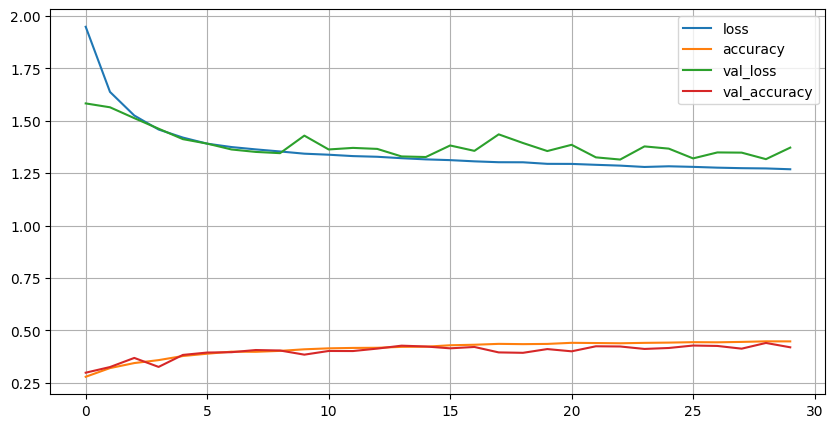

In [ ]:
pd.DataFrame(train_model_cnn_aug.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca()
plt.show()

In [ ]:
# Save the model
model_cnn_aug.save('cnn_model_aug.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 0s 28ms/step


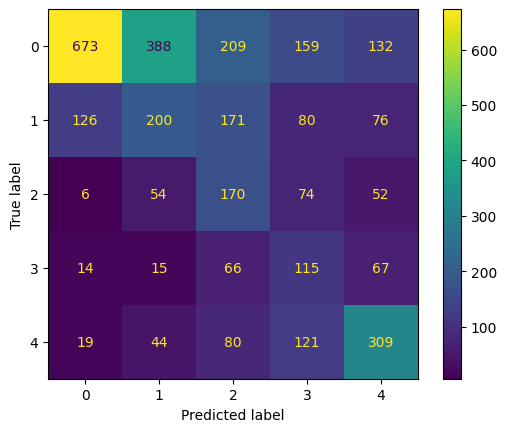

In [ ]:
# Load the model
#model_cnn_aug = load_model("model\cnn_model_aug.h5")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_labels = np.argmax(y_test, axis=1) + 1
y_pred_class = np.argmax(model_cnn_aug.predict(test_dataset), axis=1) + 1
cnf_matrix = confusion_matrix(y_pred_class, test_labels)
fig = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix)
fig.plot()

# Extract the thumbnail image from the dataframe as np

In [ ]:
def extract_thumbnail(data,dim):
    # Filter rows with valid image URLs
    valid_rows = data['thumbnail_maxres'].notna()

    # Create a new DataFrame to store the downloaded and resized images along with corresponding indices
    image_data = pd.DataFrame(columns=['index', 'image'])

    # Specify the desired dimensions (64 x 64 pixels with 3 channels)
    new_dimensions = (dim, dim, 3)

    # Use tqdm to display a progress bar
    for index, row in tqdm(data[valid_rows].iterrows(), total=len(data[valid_rows])):
        try:
            # Download image from the URL
            response = requests.get(row['thumbnail_maxres'])
            img = Image.open(BytesIO(response.content))

            # Resize the image to the desired dimensions
            resized_img = img.resize(new_dimensions[:2])

            # Convert resized image to NumPy array
            img_array = np.array(resized_img)

            # Append data to the new DataFrame
            image_data = pd.concat([image_data, pd.DataFrame({'index': [index], 'image': [img_array]})], ignore_index=True)

        except Exception as e:
            print(f"Error downloading image for index {index}: {str(e)}")

        # Print progress every 100 rows
        if index % 100 == 0:
            print(f"Processing: {index}/{len(data[valid_rows])}")

    # Save the NumPy arrays in .npz format
    np.savez('resized_images1.npz', **{f'img_{index}': img_array for index, img_array in zip(image_data['index'], image_data['image'])})

    return(image_data)

In [ ]:
# image_data = extract_thumbnail(data,128)

In [ ]:
# Save the "index" column as a text file on your local machine
loaded_image_data["index"].to_csv('index_values.txt', index=False, header=False)